<a href="https://colab.research.google.com/github/KAyush16/EDA/blob/main/supplement_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import the dataset
supplement = pd.read_csv('/content/Supplement_Sales_Weekly_Expanded.csv')
df = supplement.copy()
df.head()

Date  Product Name     Category  Units Sold  Price  Revenue  \
0  2020-01-06  Whey Protein      Protein         143  31.98  4573.14   
1  2020-01-06     Vitamin C      Vitamin         139  42.51  5908.89   
2  2020-01-06      Fish Oil        Omega         161  12.91  2078.51   
3  2020-01-06  Multivitamin      Vitamin         140  16.07  2249.80   
4  2020-01-06   Pre-Workout  Performance         157  35.47  5568.79   

   Discount  Units Returned Location Platform  
0      0.03               2   Canada  Walmart  
1      0.04               0       UK   Amazon  
2      0.25               0   Canada   Amazon  
3      0.08               0   Canada  Walmart  
4      0.25               3   Canada    iHerb

In [4]:
df.info()
# no null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


<Axes: >

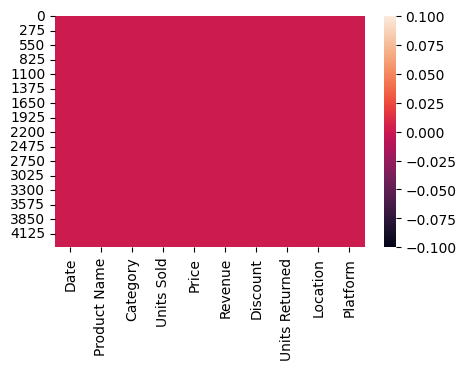

In [5]:
plt.figure(figsize=(5,3))
sns.heatmap(df.isna())

In [6]:
df.describe()

Units Sold        Price       Revenue     Discount  Units Returned
count  4384.000000  4384.000000   4384.000000  4384.000000     4384.000000
mean    150.200274    34.781229   5226.569446     0.124398        1.531478
std      12.396099    14.198309   2192.491946     0.071792        1.258479
min     103.000000    10.000000   1284.000000     0.000000        0.000000
25%     142.000000    22.597500   3349.372500     0.060000        1.000000
50%     150.000000    34.720000   5173.140000     0.120000        1.000000
75%     158.000000    46.712500   7009.960000     0.190000        2.000000
max     194.000000    59.970000  10761.850000     0.250000        8.000000

In [7]:
# convert Date --> datetime object
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df

Date        Product Name     Category  Units Sold  Price  Revenue  \
0    2020-01-06        Whey Protein      Protein         143  31.98  4573.14   
1    2020-01-06           Vitamin C      Vitamin         139  42.51  5908.89   
2    2020-01-06            Fish Oil        Omega         161  12.91  2078.51   
3    2020-01-06        Multivitamin      Vitamin         140  16.07  2249.80   
4    2020-01-06         Pre-Workout  Performance         157  35.47  5568.79   
...         ...                 ...          ...         ...    ...      ...   
4379 2025-03-31           Melatonin    Sleep Aid         160  47.79  7646.40   
4380 2025-03-31              Biotin      Vitamin         154  38.12  5870.48   
4381 2025-03-31   Green Tea Extract   Fat Burner         139  20.40  2835.60   
4382 2025-03-31     Iron Supplement      Mineral         154  18.31  2819.74   
4383 2025-03-31  Electrolyte Powder    Hydration         178  39.12  6963.36   

      Discount  Units Returned Location Platform  
0         0.03               2   Canada  Walmart  
1         0.04               0       UK   Amazon  
2         0.25               0   Canada   Amazon  
3         0.08               0   Canada  Walmart  
4         0.25               3   Canada    iHerb  
...        ...             ...      ...      ...  
4379      0.21               1      USA    iHerb  
4380      0.22               1       UK  Walmart  
4381      0.12               3      USA    iHerb  
4382      0.23               2   Canada   Amazon  
4383      0.23               0       UK    iHerb  

[4384 rows x 10 columns]

In [9]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
display(df.head())

Date  Product Name     Category  Units Sold  Price  Revenue  Discount  \
0 2020-01-06  Whey Protein      Protein         143  31.98  4573.14      0.03   
1 2020-01-06     Vitamin C      Vitamin         139  42.51  5908.89      0.04   
2 2020-01-06      Fish Oil        Omega         161  12.91  2078.51      0.25   
3 2020-01-06  Multivitamin      Vitamin         140  16.07  2249.80      0.08   
4 2020-01-06   Pre-Workout  Performance         157  35.47  5568.79      0.25   

   Units Returned Location Platform  Year  Month  
0               2   Canada  Walmart  2020      1  
1               0       UK   Amazon  2020      1  
2               0   Canada   Amazon  2020      1  
3               0   Canada  Walmart  2020      1  
4               3   Canada    iHerb  2020      1

# EDA on Supplement Data

## Analysis over the time

In [10]:
# yearly growth over number of units sold
yearly_units_sold = df.groupby('Year')['Units Sold'].sum()
yearly_units_sold

Year
2020    124657
2021    124701
2022    125167
2023    125038
2024    127707
2025     31208
Name: Units Sold, dtype: int64

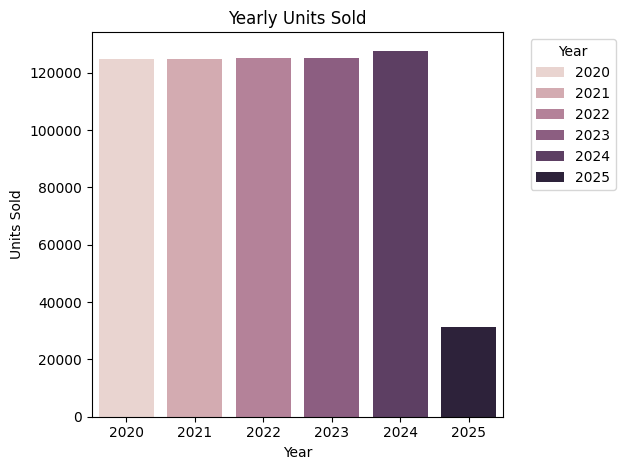

In [11]:
sns.barplot(x=yearly_units_sold.index, y=yearly_units_sold.values, hue = yearly_units_sold.index)
plt.title('Yearly Units Sold')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
# monthly sales on based of units sold year over year
monthly_sales = df.groupby(['Month', 'Year'])['Units Sold'].sum()
monthly_sales_unstack = monthly_sales.unstack(level=1)
display(monthly_sales_unstack)
# for month in monthly_sales_unstack.index:
#     print(monthly_sales_unstack.loc[month])

Year      2020     2021     2022     2023     2024     2025
Month                                                      
1       9547.0   9585.0  12039.0  11955.0  12037.0   9617.0
2       9493.0   9735.0   9705.0   9634.0   9331.0   9542.0
3      12145.0  12042.0   9788.0   9526.0   9848.0  12049.0
4       9605.0   9602.0   9515.0   9678.0  12244.0      NaN
5       9557.0  12010.0  12021.0  12039.0   9498.0      NaN
6      11972.0   9606.0   9617.0   9763.0   9597.0      NaN
7       9577.0   9727.0   9598.0  11962.0  12074.0      NaN
8      12085.0  11801.0  12084.0   9521.0   9631.0      NaN
9       9430.0   9523.0   9557.0   9652.0  12042.0      NaN
10      9550.0   9544.0  11973.0  12087.0   9525.0      NaN
11     12104.0  11896.0   9730.0   9510.0   9838.0      NaN
12      9592.0   9630.0   9540.0   9711.0  12042.0      NaN

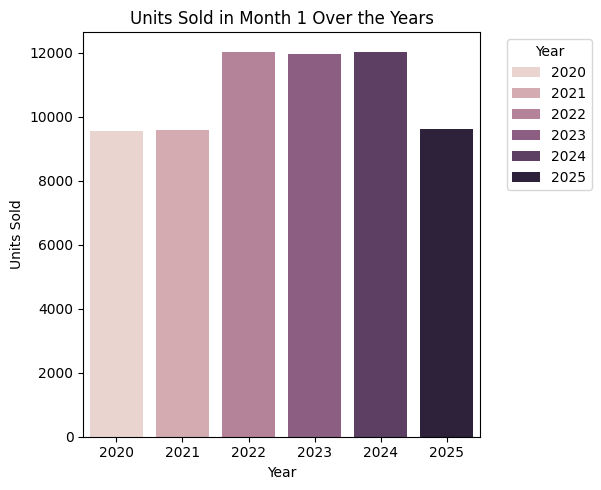

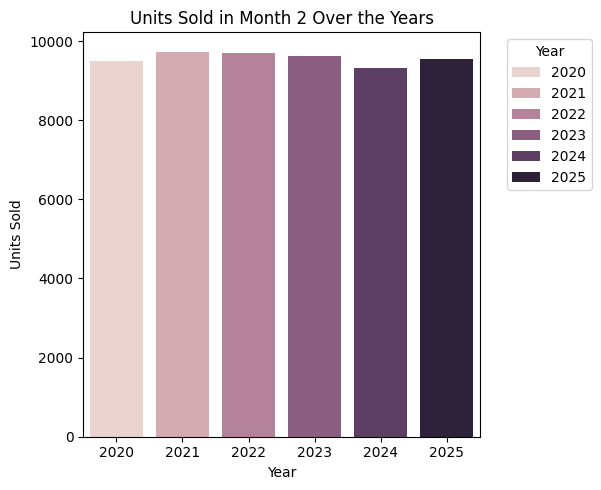

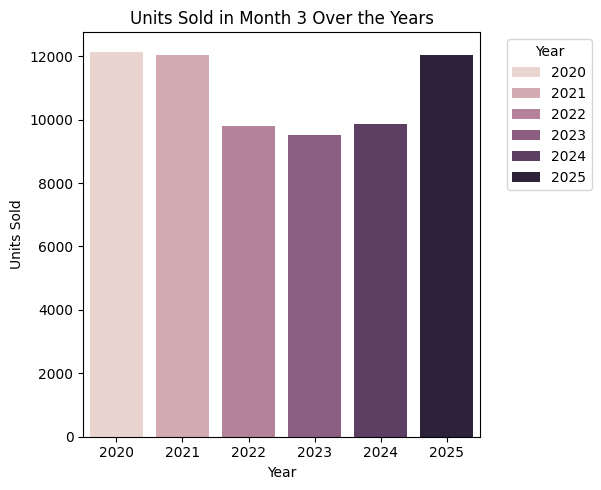

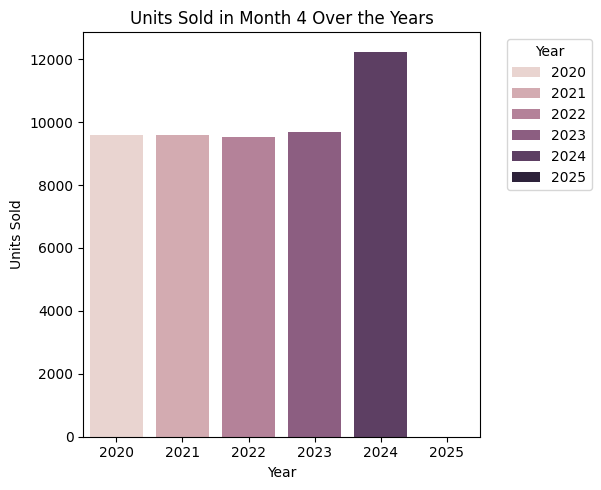

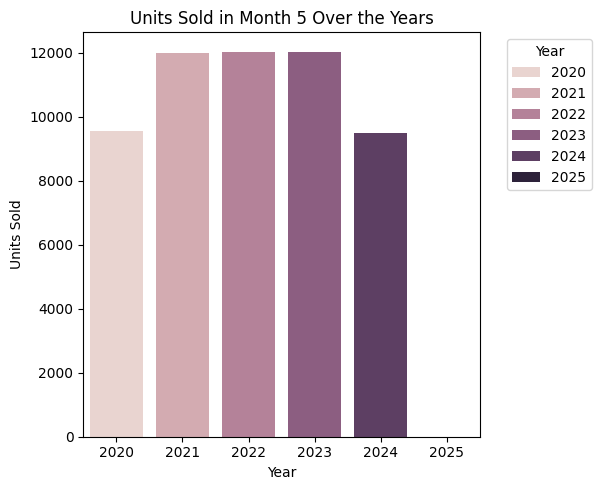

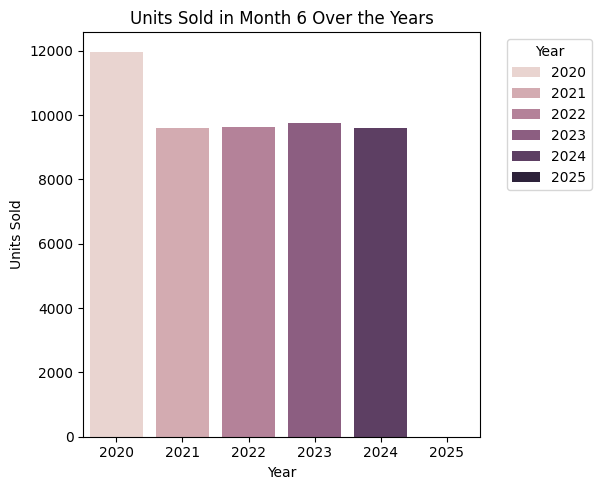

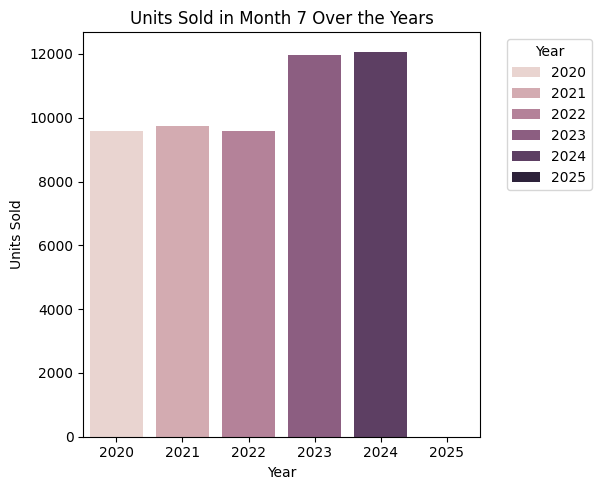

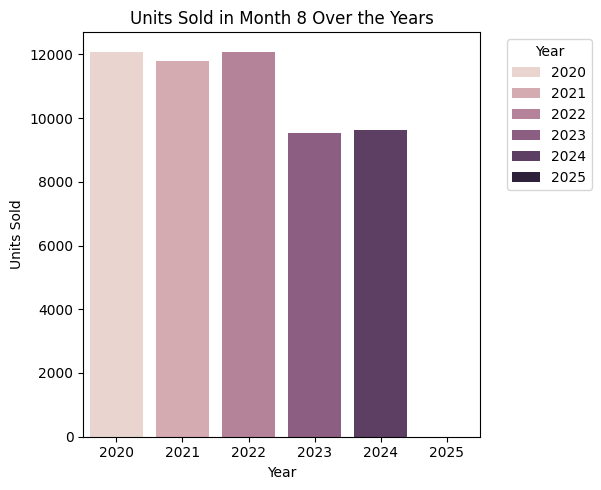

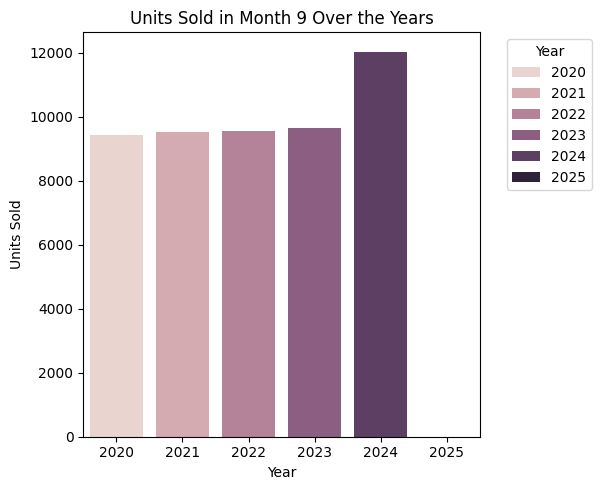

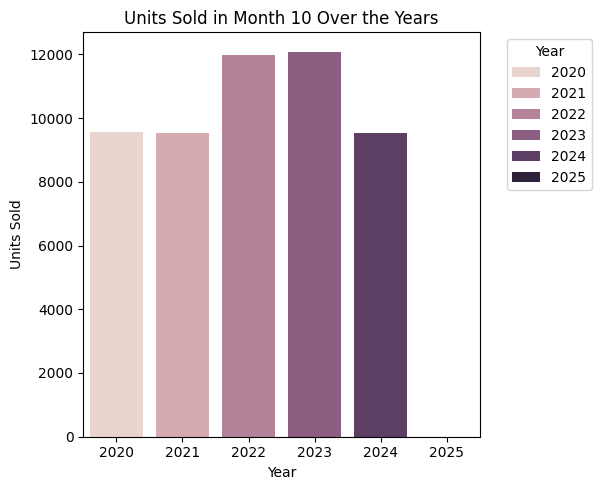

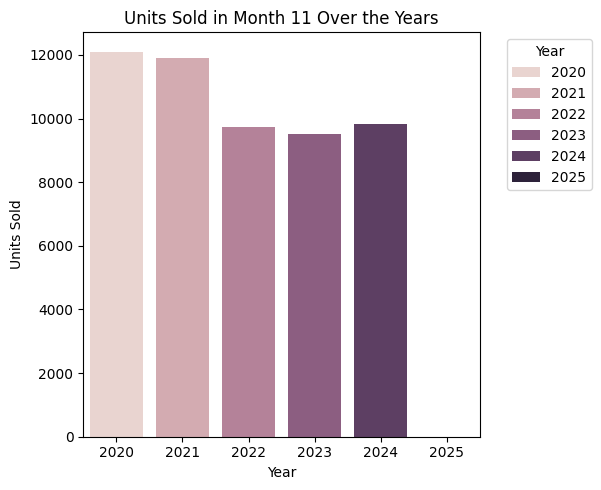

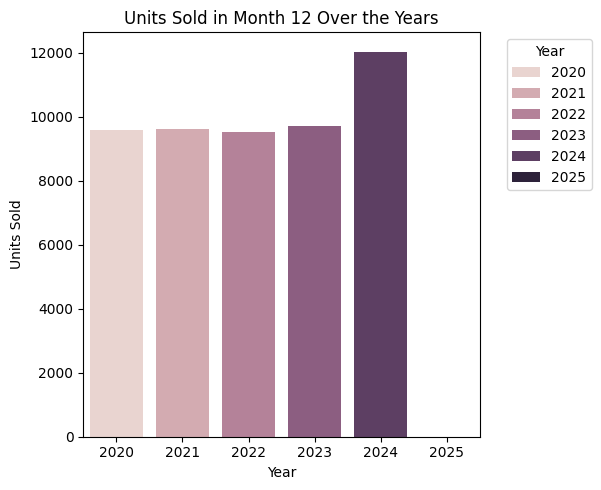

In [13]:
# monthly sales on based of units sold year over year

monthly_sales = df.groupby(['Month', 'Year'])['Units Sold'].sum()
monthly_sales_unstack = monthly_sales.unstack(level=1)

# Create a separate bar plot for each month
for month in monthly_sales_unstack.index:
    plt.figure(figsize=(5,5))
    sns.barplot(x=monthly_sales_unstack.loc[month].index, y=monthly_sales_unstack.loc[month].values,
                hue=monthly_sales_unstack.loc[month].index)
    plt.title(f'Units Sold in Month {month} Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Units Sold')
    plt.tight_layout()
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [14]:
#Revenue of each month over years
plt.figure(figsize=(12,6))
revenue_months_year = df.groupby(["Year","Month"])['Revenue'].sum()
revenue_months_year_unstack = revenue_months_year.unstack(level=1)
revenue_months_year_unstack

Month         1          2          3          4          5          6   \
Year                                                                      
2020   290723.89  355213.26  416547.17  326287.92  333210.99  422113.85   
2021   323560.24  319529.68  419063.37  311530.28  405967.09  351021.55   
2022   434031.13  390619.08  391316.67  304012.58  404822.95  346671.34   
2023   425781.96  343886.01  337161.73  324019.84  450800.65  377007.17   
2024   392903.68  322030.56  331078.45  419811.68  325279.53  330063.49   
2025   304965.15  341768.25  375859.01        NaN        NaN        NaN   

Month         7          8          9          10         11         12  
Year                                                                     
2020   341776.22  413832.50  331064.85  346455.70  393011.54  353155.33  
2021   332591.32  441547.72  332949.51  332562.07  388195.58  335729.76  
2022   335384.71  388964.54  330708.62  366658.24  330093.60  349525.09  
2023   434431.88  327439.79  337633.31  448324.56  309596.51  354787.34  
2024   405247.71  354207.03  450081.31  322040.59  329894.33  446728.99  
2025         NaN        NaN        NaN        NaN        NaN        NaN

<Figure size 1200x600 with 0 Axes>

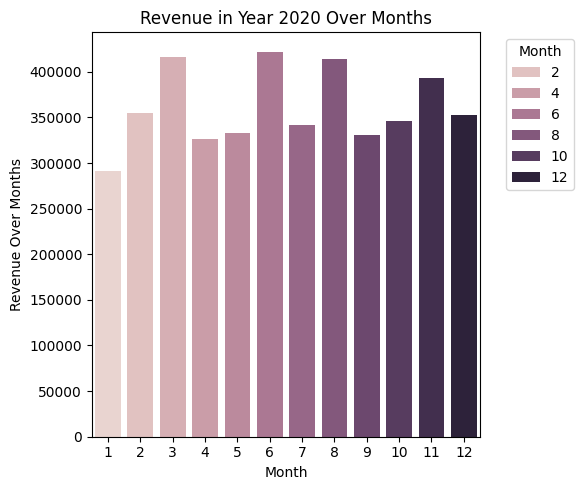

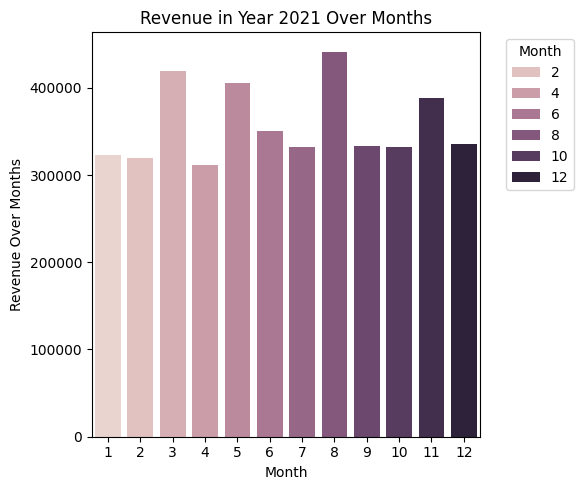

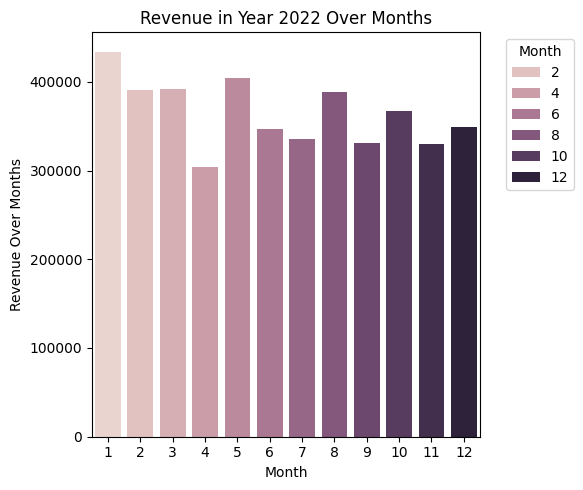

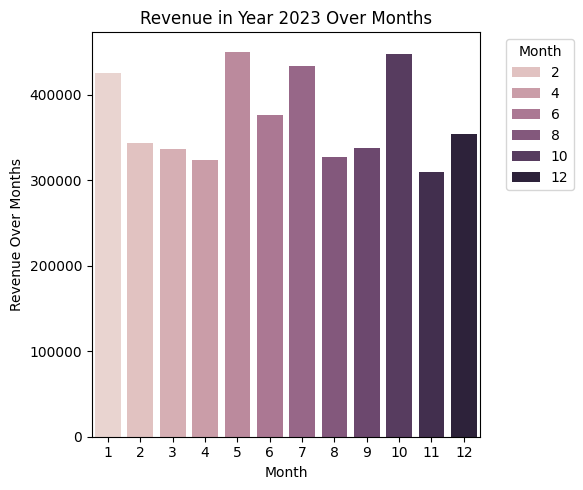

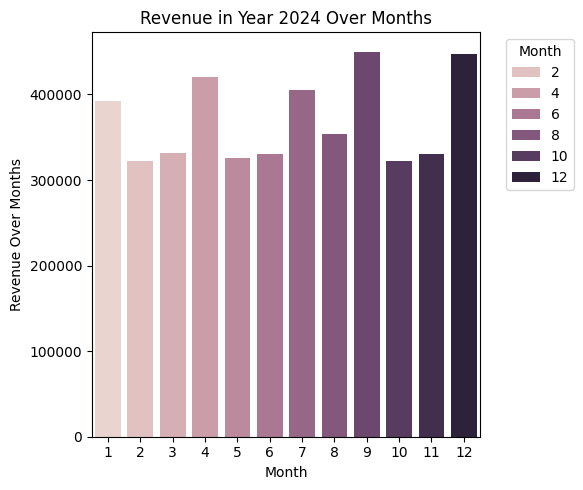

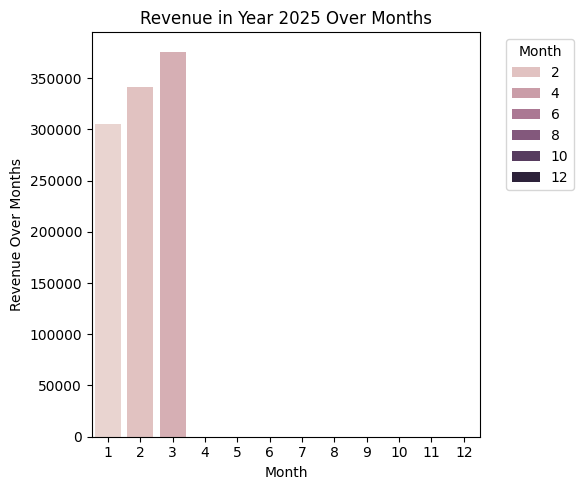

In [15]:
for year in revenue_months_year_unstack.index:
    plt.figure(figsize=(5,5))
    sns.barplot(x=revenue_months_year_unstack.loc[year].index, y=revenue_months_year_unstack.loc[year].values,
                hue=revenue_months_year_unstack.loc[year].index)
    plt.title(f'Revenue in Year {year} Over Months')
    plt.xlabel('Month')
    plt.ylabel('Revenue Over Months')
    plt.tight_layout()
    plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

## Analyis over Product-Name & Category

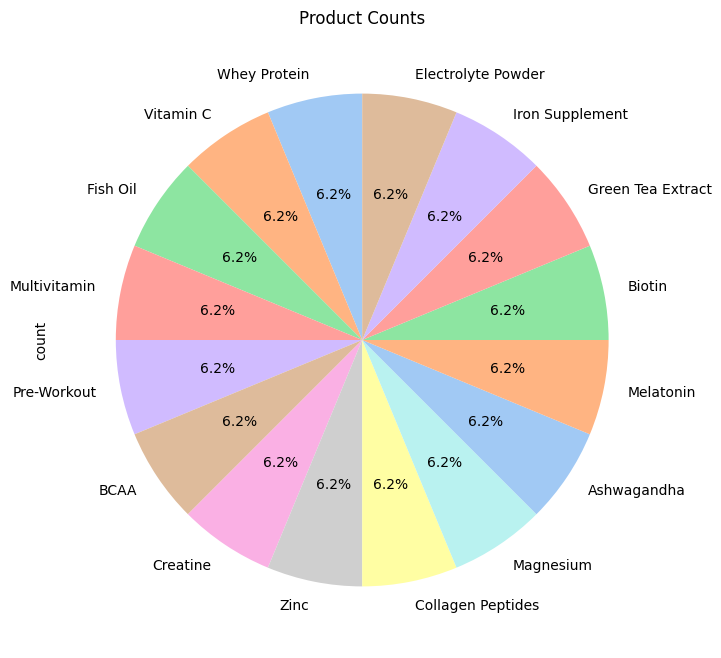

In [41]:
# Product count
category_counts = df['Product Name'].value_counts()
plt.figure(figsize=(8,8))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90,colors=sns.color_palette('pastel'))
plt.title('Product Counts')
plt.show()

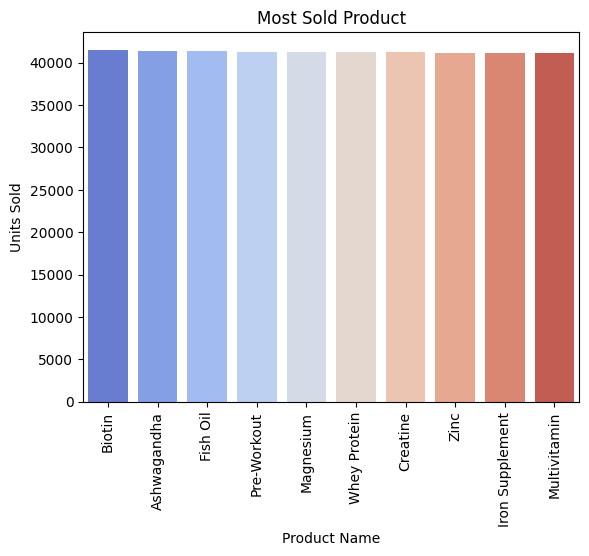

In [39]:
# Top 10 most sold product as per units sold
most_sold_product = df.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False).nlargest(10)
#most_sold_product
sns.barplot(x=most_sold_product.index, y=most_sold_product.values,palette='coolwarm')
plt.title('Most Sold Product')
plt.xlabel('Product Name')
plt.ylabel('Units Sold')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Product Name', ylabel='Units Sold'>

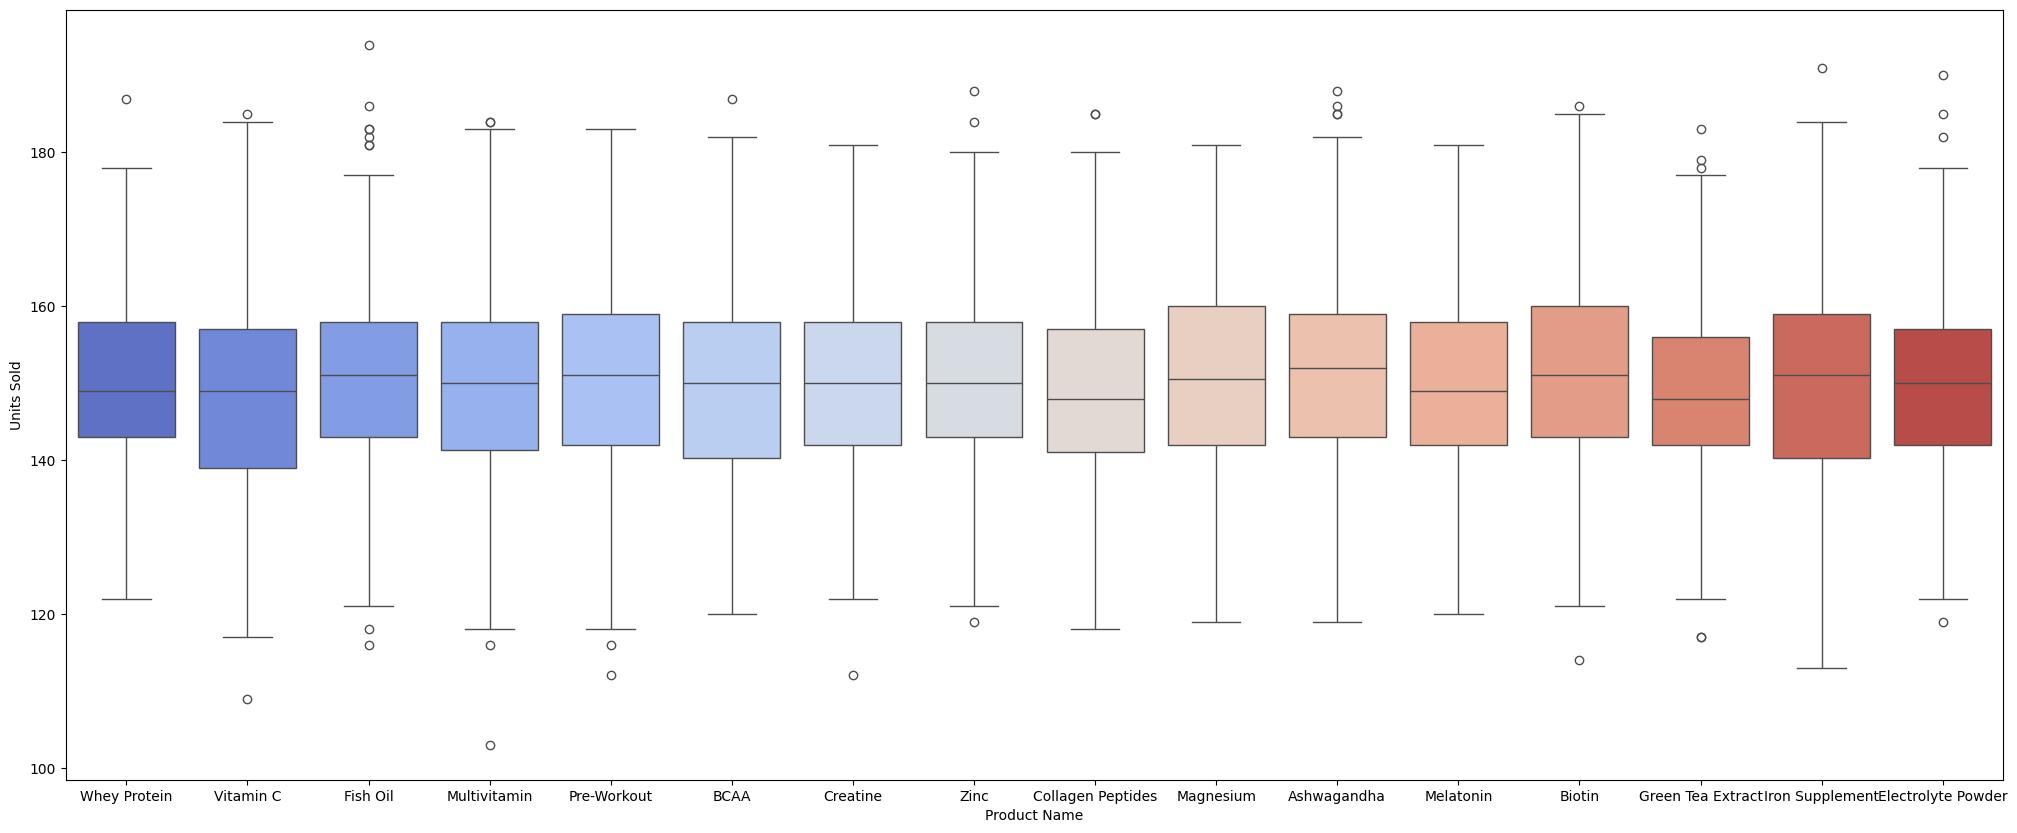

In [38]:
# spreadness of product data
plt.figure(figsize=(25,10))
sns.boxplot(x='Product Name',
            y='Units Sold',
            data=df,
            palette='coolwarm')

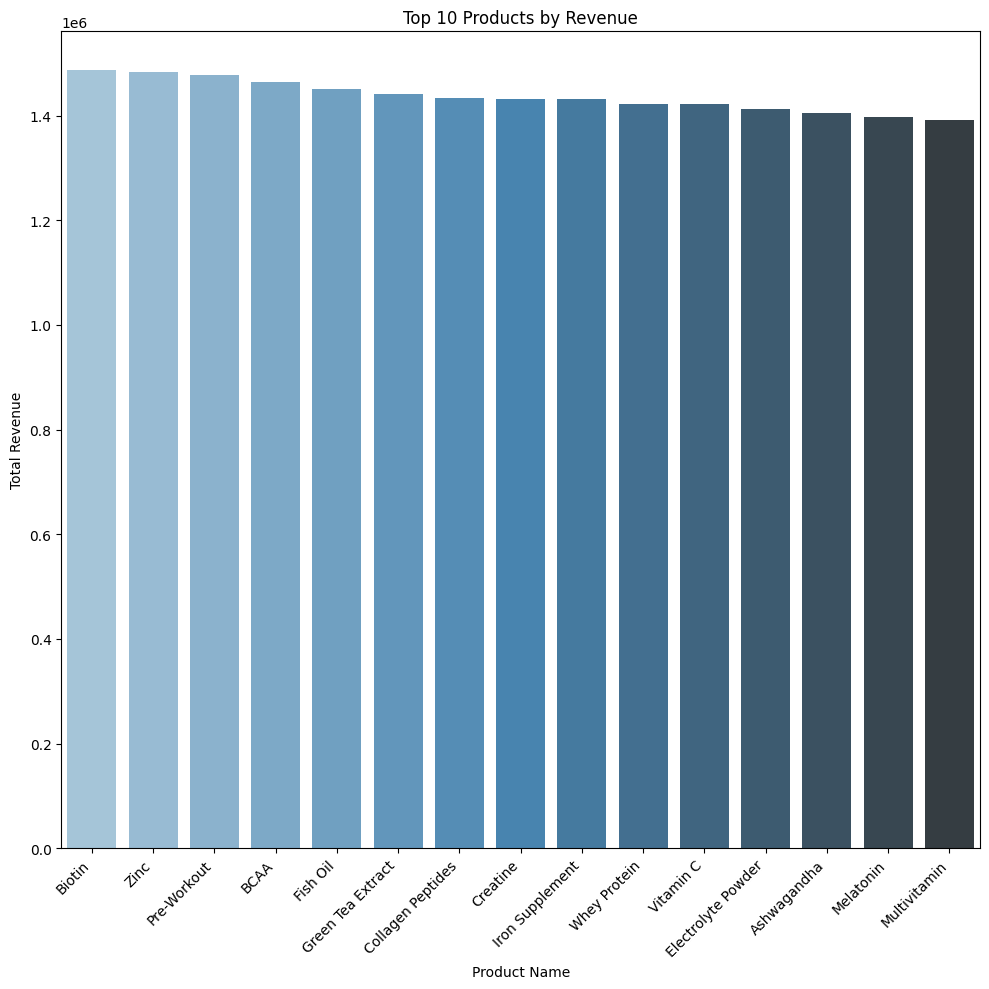

In [115]:
# Top 10 most demand product as total revenue earned
top10_products = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).head(15).reset_index()
plt.figure(figsize=(10,10))
sns.barplot(data=top10_products,x="Product Name",y="Revenue",palette="Blues_d")
plt.title("Top 10 Products by Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Product Name")
plt.xticks(rotation=45,ha='right') # ha --> horizontal allignment
plt.tight_layout()
plt.show()

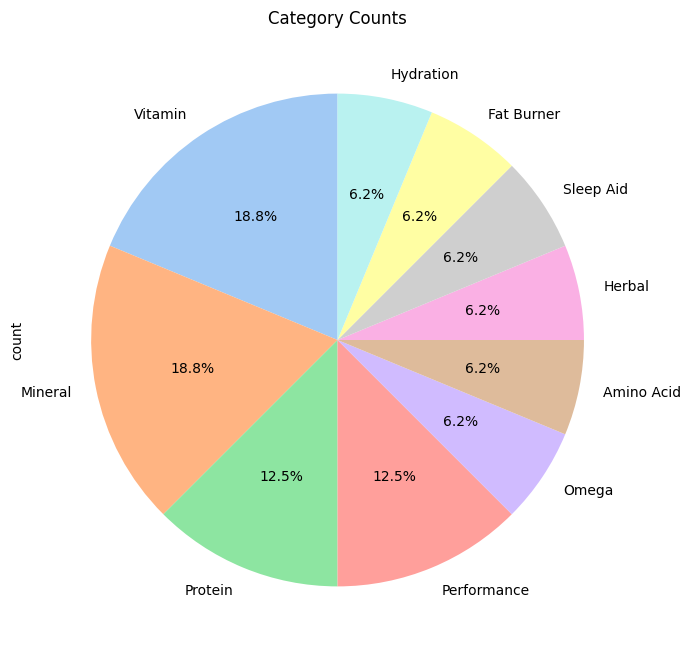

In [42]:
# category count
category_counts = df['Category'].value_counts()
plt.figure(figsize=(8,8))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90,colors=sns.color_palette('pastel'))
plt.title('Category Counts')
plt.show()

In [48]:
# Top 10 most demand category (as per units sold & as per revenue) subplot
most_demand_category = df.groupby('Category')['Units Sold'].sum().sort_values(ascending=False).nlargest(10)
most_demand_category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False).nlargest(10)
display(most_demand_category)
display(most_demand_category_revenue)

Category
Mineral        123668
Vitamin        123434
Performance     82523
Protein         82120
Herbal          41408
Omega           41325
Sleep Aid       41165
Hydration       41065
Amino Acid      41027
Fat Burner      40743
Name: Units Sold, dtype: int64

Category
Vitamin        4300224.68
Mineral        4276107.99
Performance    2909702.18
Protein        2855492.09
Amino Acid     1464819.63
Omega          1451065.87
Fat Burner     1440900.05
Hydration      1411951.38
Herbal         1405700.79
Sleep Aid      1397315.79
Name: Revenue, dtype: float64

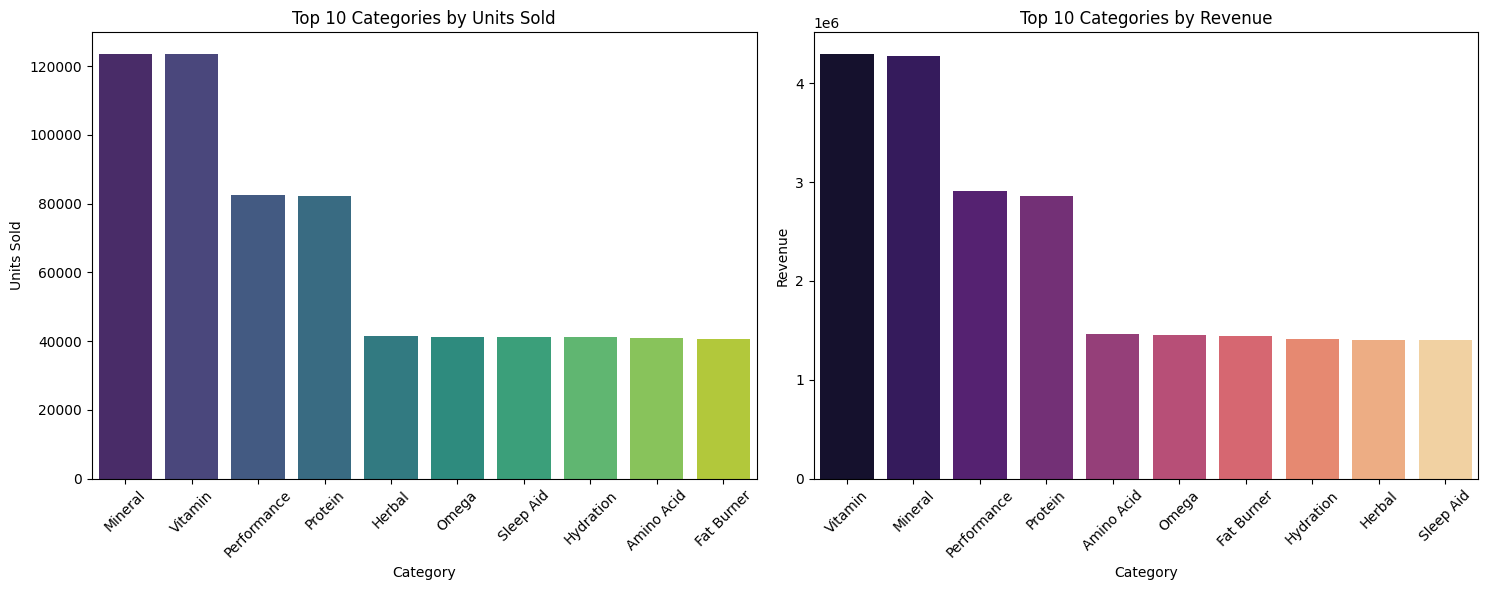

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Units Sold
sns.barplot(x=most_demand_category.index, y=most_demand_category.values,ax = axes[0] , palette='viridis')
axes[0].set_title('Top 10 Categories by Units Sold')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Units Sold')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Revenue
sns.barplot(x=most_demand_category_revenue.index, y=most_demand_category_revenue.values,ax = axes[1] , palette='magma')
axes[1].set_title('Top 10 Categories by Revenue')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Revenue')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [21]:
df

Date        Product Name     Category  Units Sold  Price  Revenue  \
0    2020-01-06        Whey Protein      Protein         143  31.98  4573.14   
1    2020-01-06           Vitamin C      Vitamin         139  42.51  5908.89   
2    2020-01-06            Fish Oil        Omega         161  12.91  2078.51   
3    2020-01-06        Multivitamin      Vitamin         140  16.07  2249.80   
4    2020-01-06         Pre-Workout  Performance         157  35.47  5568.79   
...         ...                 ...          ...         ...    ...      ...   
4379 2025-03-31           Melatonin    Sleep Aid         160  47.79  7646.40   
4380 2025-03-31              Biotin      Vitamin         154  38.12  5870.48   
4381 2025-03-31   Green Tea Extract   Fat Burner         139  20.40  2835.60   
4382 2025-03-31     Iron Supplement      Mineral         154  18.31  2819.74   
4383 2025-03-31  Electrolyte Powder    Hydration         178  39.12  6963.36   

      Discount  Units Returned Location Platform  Year  Month  
0         0.03               2   Canada  Walmart  2020      1  
1         0.04               0       UK   Amazon  2020      1  
2         0.25               0   Canada   Amazon  2020      1  
3         0.08               0   Canada  Walmart  2020      1  
4         0.25               3   Canada    iHerb  2020      1  
...        ...             ...      ...      ...   ...    ...  
4379      0.21               1      USA    iHerb  2025      3  
4380      0.22               1       UK  Walmart  2025      3  
4381      0.12               3      USA    iHerb  2025      3  
4382      0.23               2   Canada   Amazon  2025      3  
4383      0.23               0       UK    iHerb  2025      3  

[4384 rows x 12 columns]

In [44]:
top_products_by_country = (
    df.groupby('Location')['Product Name']
      .value_counts()                               # Count occurrences of each product within each location
      .groupby(level=0)                             # Group again by 'Location' (level 0 of MultiIndex)
      .nlargest(5)                                  # Take Top 5 for each location
      .reset_index(level=0, drop=True)              # Remove extra index
)
top_products_by_country

Location  Product Name      
Canada    Creatine              115
          Fish Oil              103
          Green Tea Extract     102
          Collagen Peptides     101
          Melatonin             101
UK        Biotin                108
          BCAA                  105
          Magnesium             100
          Zinc                  100
          Multivitamin           97
USA       Ashwagandha           100
          Multivitamin           96
          Iron Supplement        95
          Biotin                 94
          Electrolyte Powder     92
Name: count, dtype: int64

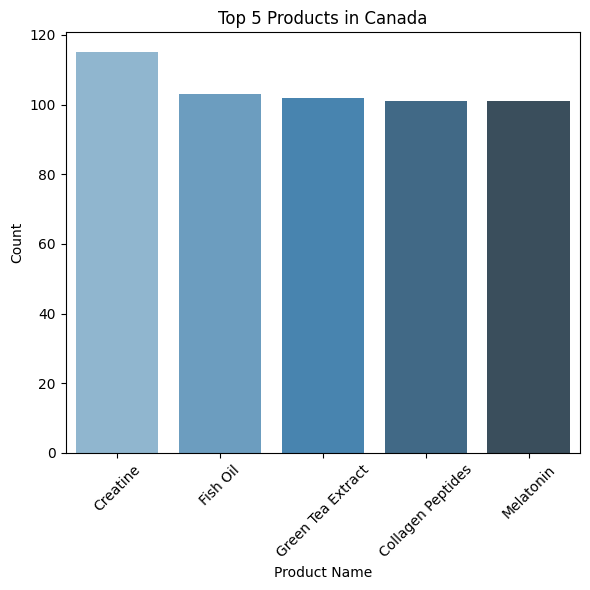

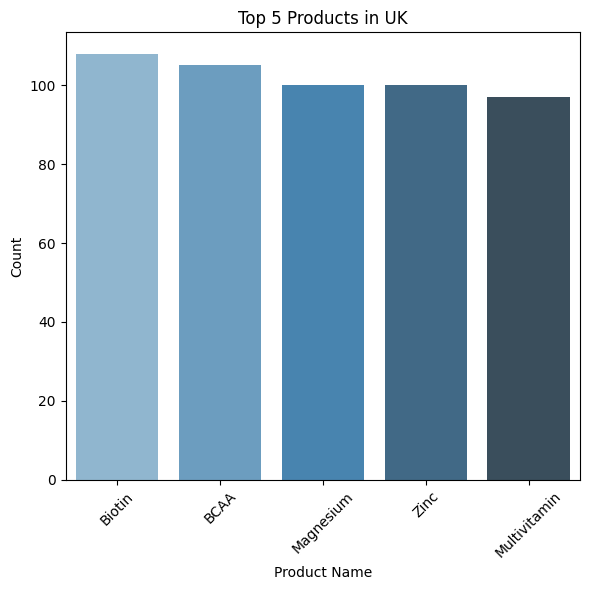

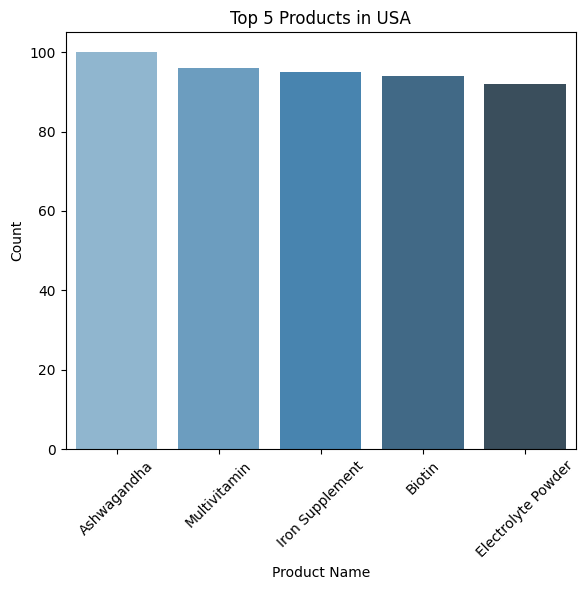

In [55]:
# top 5 products used in different countries(used gemini on loop logic and reset_index thing)
'''
1>  df.groupby('Location')['Product Name'].value_counts() first groups the DataFrame by 'Location' and then counts
 the occurrences of each 'Product Name' within each location. This results in a pandas Series with a MultiIndex,
  where the first level of the index is 'Location' and the second level is 'Product Name'.
2> .groupby(level=0) then groups this resulting Series by the first level of its MultiIndex,
which is the 'Location'. This allows us to apply the nlargest(5) operation to each location group independently.
'''
top_products_by_country = df.groupby('Location')['Product Name'].value_counts().groupby(level=0).nlargest(5).reset_index(level=0, drop=True)

for country in top_products_by_country.index.get_level_values('Location').unique():

    plt.figure(figsize=(6, 6))
    country_data = top_products_by_country.loc[country] #extract Product Name (index) and its Count(values)

    sns.barplot(x=country_data.index, y=country_data.values,
                hue=country_data.index,palette="Blues_d")

    plt.title(f'Top 5 Products in {country}')
    plt.xlabel('Product Name')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Relation & Analysis In Revenue, Discount and their sales

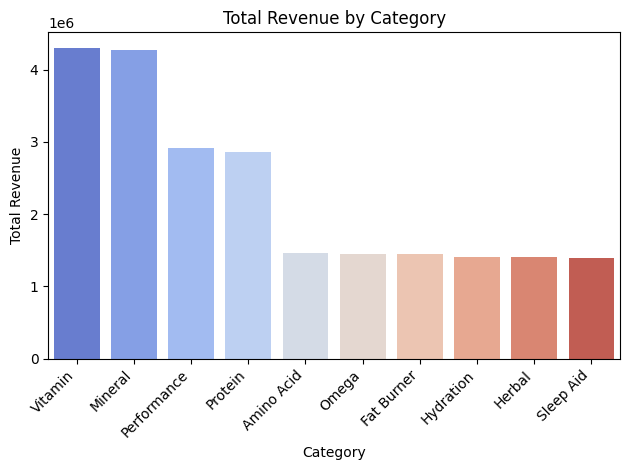

In [64]:
# relation between total revenue and that category price
total_revenue_category = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=total_revenue_category.index, y=total_revenue_category.values,palette='coolwarm')
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

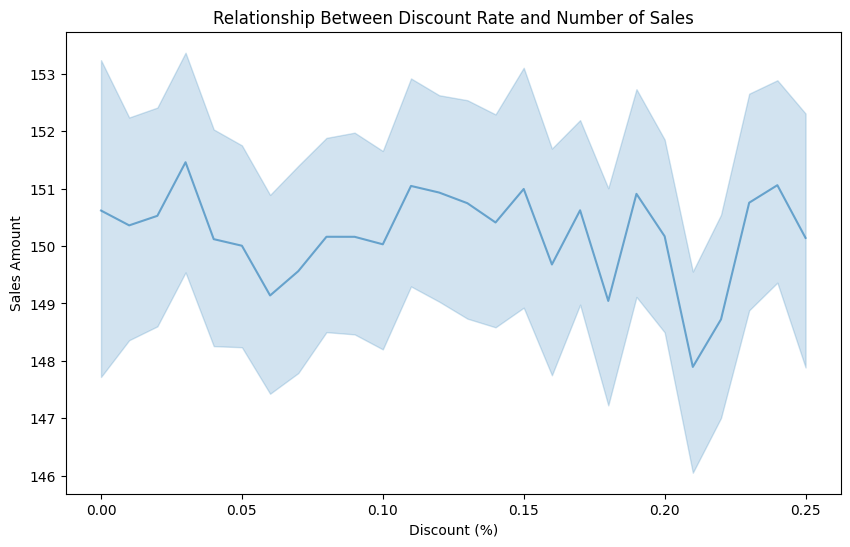

In [56]:
# rln between discount and units sold
plt.figure(figsize=(10,6))
sns.lineplot(x="Discount",y="Units Sold",data=df,alpha=0.6)
plt.title("Relationship Between Discount Rate and Number of Sales")
plt.xlabel("Discount (%)")
plt.ylabel("Sales Amount")
plt.show()

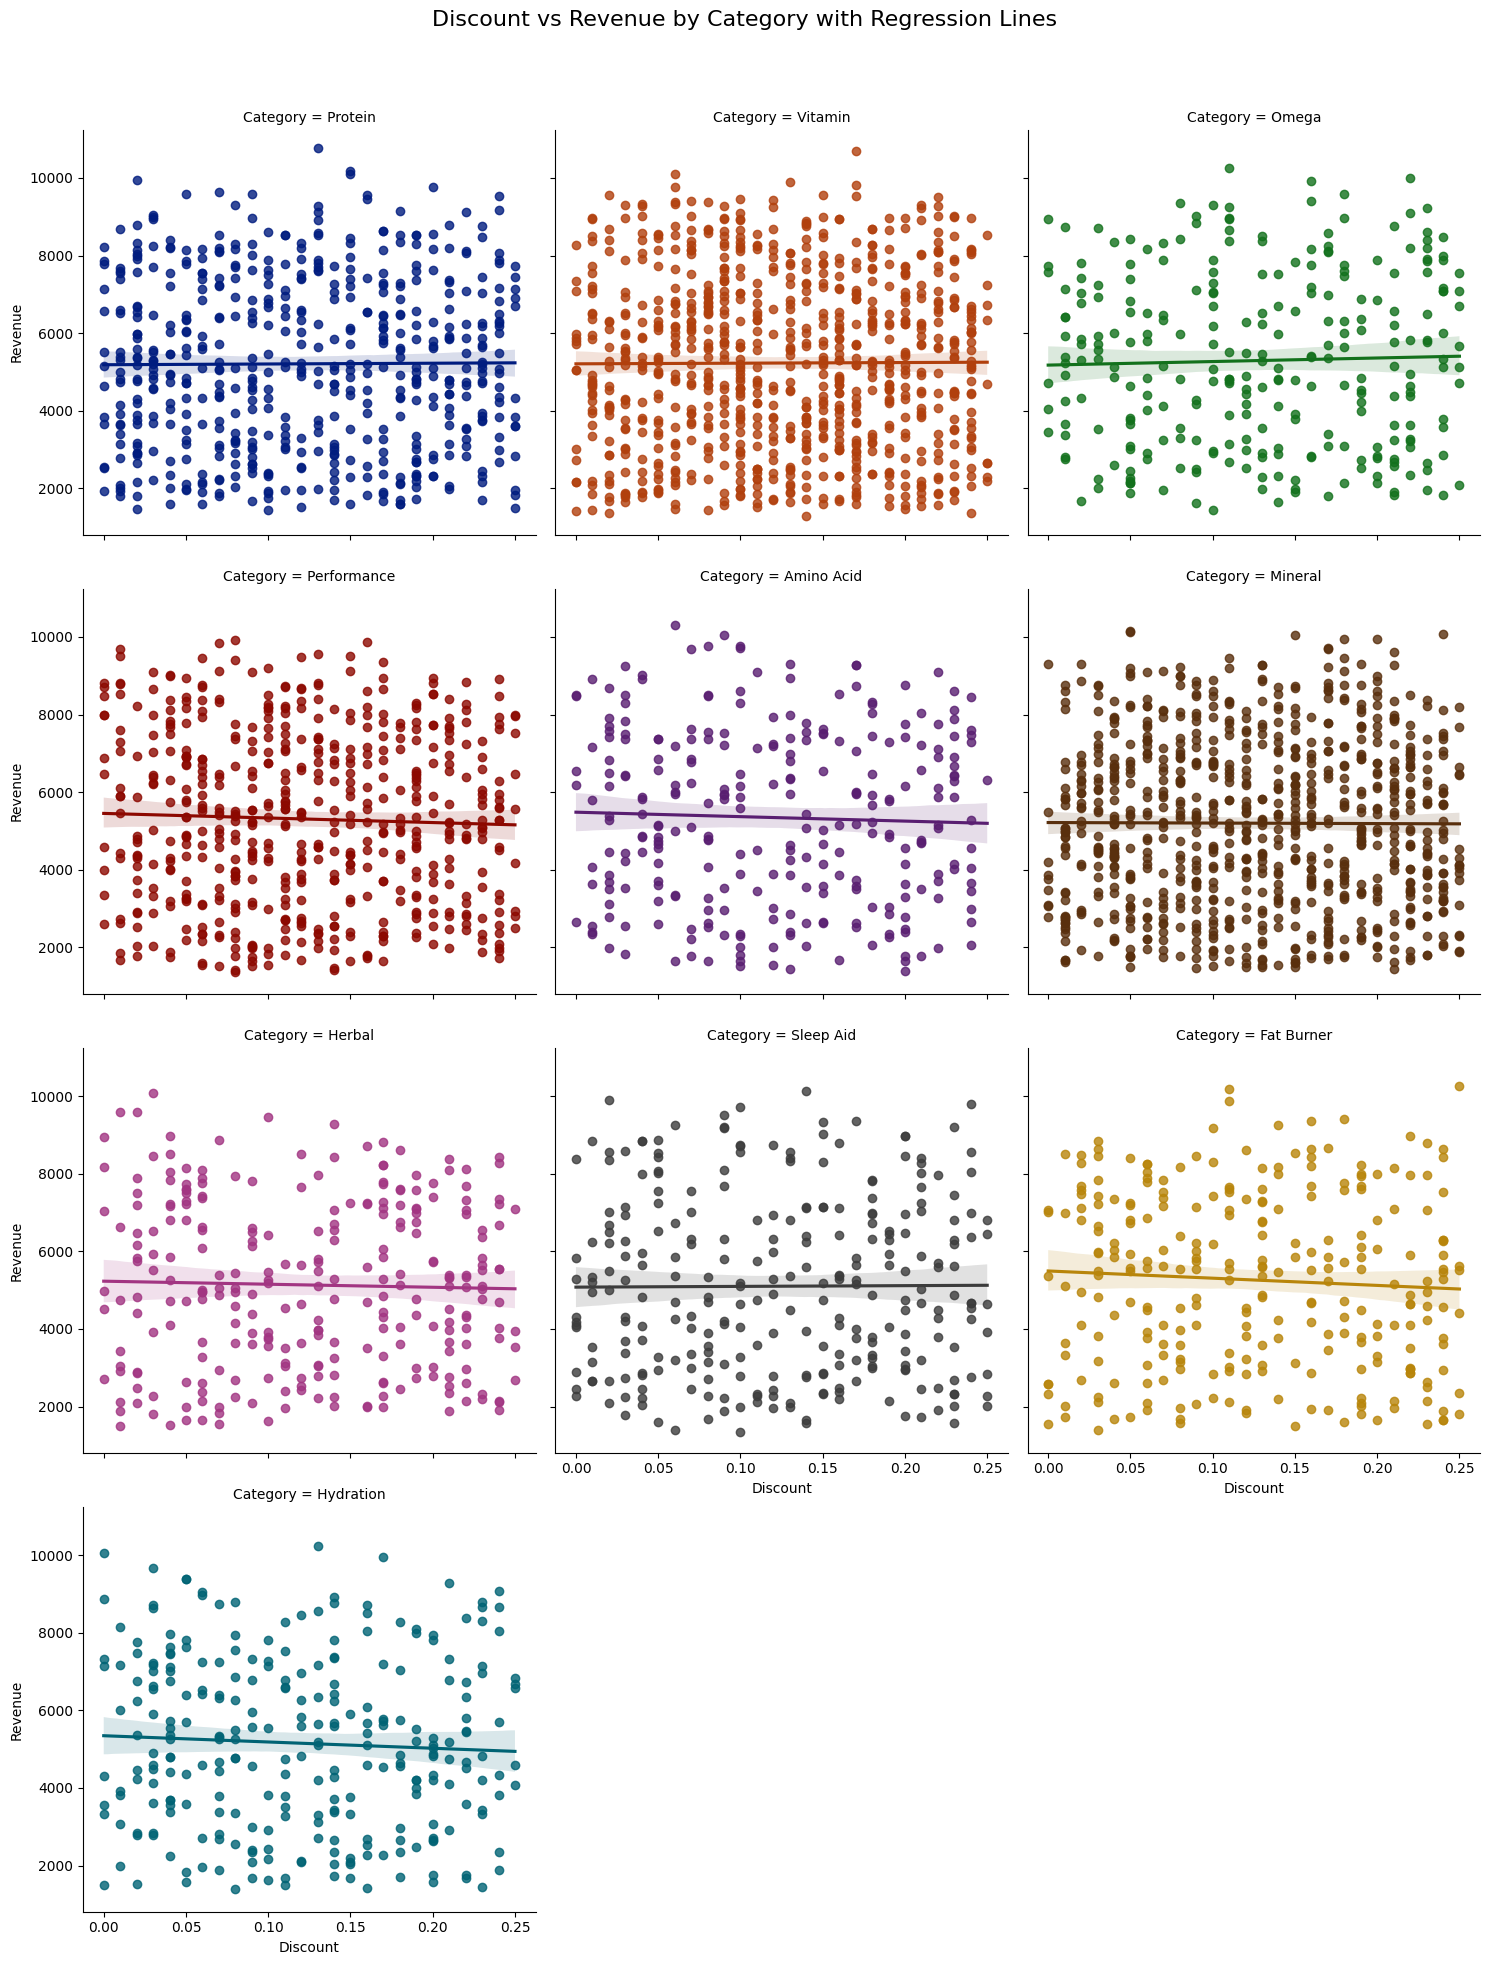

In [89]:
# discount vs revenue (as per category)
sns.lmplot(
    data=df,
    x='Discount',
    y='Revenue',
    col='Category',     # Separate plots for each category
    col_wrap=3,         # Arrange in grid with 4 columns
    hue='Category',     # Color points by category
    palette='dark'
)
plt.subplots_adjust(top=0.92)
plt.suptitle("Discount vs Revenue by Category with Regression Lines", fontsize=16) # Super-Title
plt.show()

## Units Returned

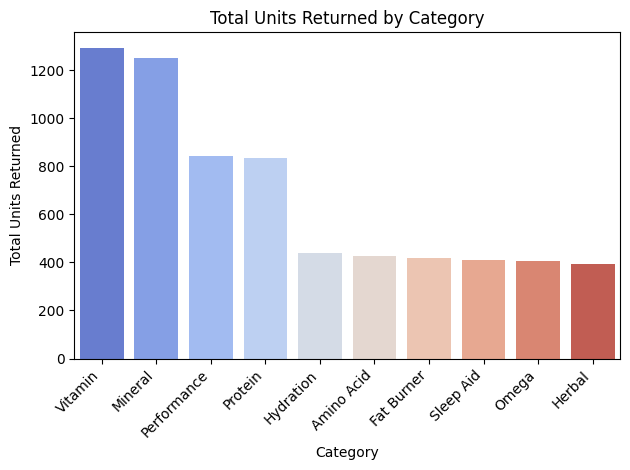

In [78]:
# per category total units returned
category_units_return = df.groupby('Category')['Units Returned'].sum().sort_values(ascending=False)
sns.barplot(x=category_units_return.index, y=category_units_return.values,palette='coolwarm')
plt.title('Total Units Returned by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Returned')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

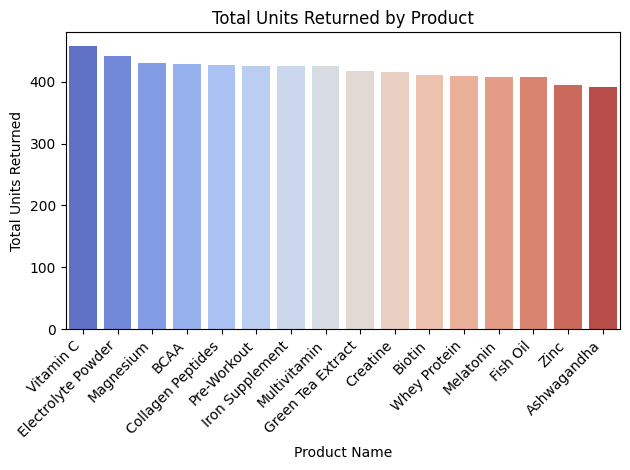

In [79]:
# per product total units returned
product_units_return = df.groupby('Product Name')['Units Returned'].sum().sort_values(ascending=False)
sns.barplot(x=product_units_return.index, y=product_units_return.values,palette='coolwarm')
plt.title('Total Units Returned by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Units Returned')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [81]:
# most returned products per loation per year
return_location = df.groupby(['Location','Year'])['Units Returned'].sum().sort_values(ascending=False)
return_location_unstack = return_location.unstack(level=1)
return_location_unstack

Year      2020  2021  2022  2023  2024  2025
Location                                    
Canada     439   383   415   453   448   121
UK         433   452   441   440   444   117
USA        410   416   385   385   440    92

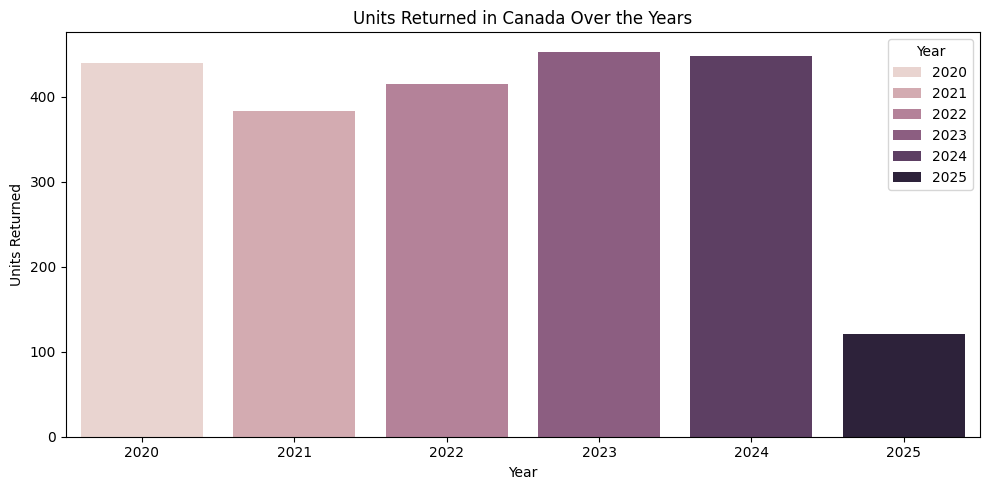

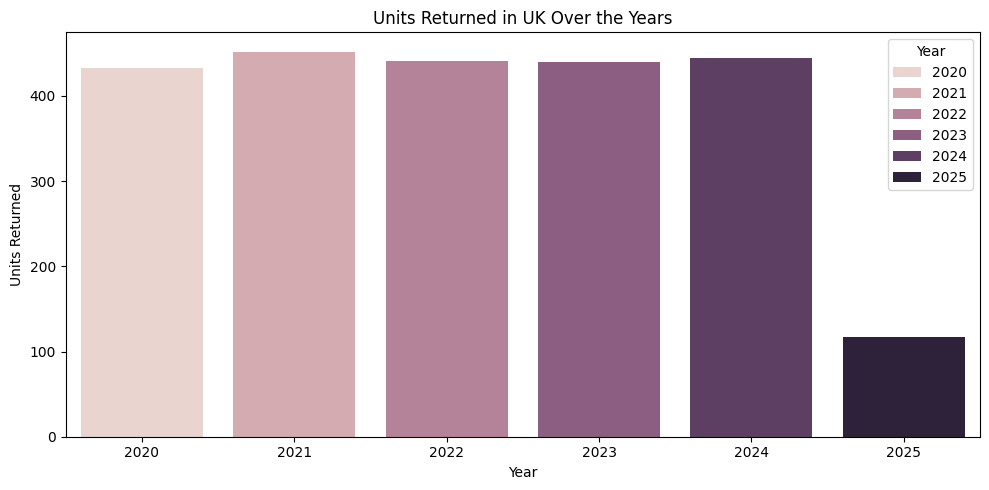

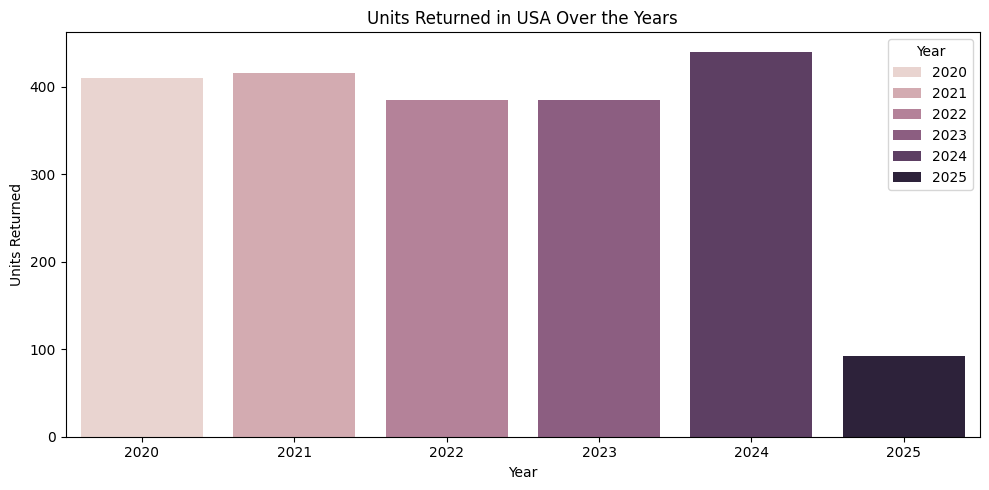

In [84]:
for location in return_location_unstack.index:
  fig, ax = plt.subplots(figsize=(10,5))
  sns.barplot(x=return_location_unstack.loc[location].index, y=return_location_unstack.loc[location].values,
              ax=ax,hue=return_location_unstack.loc[location].index)
  ax.set_title(f'Units Returned in {location} Over the Years')
  ax.set_xlabel('Year')
  ax.set_ylabel('Units Returned')
  plt.tight_layout()
  plt.show()
  # return_location_unstack.loc[location].index this will give --> Year

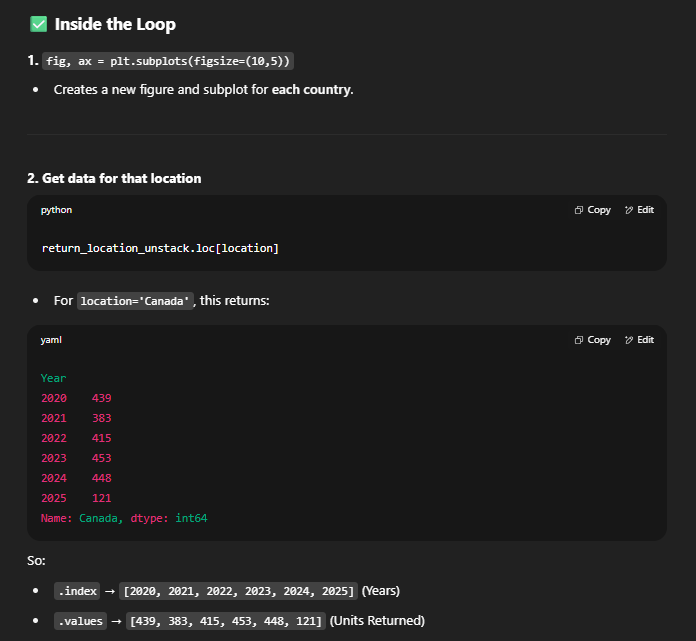

In [92]:
df.Platform.unique()

array(['Walmart', 'Amazon', 'iHerb'], dtype=object)

In [93]:
# most units returned from which Platform per year
platoform_return_year = df.groupby(['Platform','Year'])['Units Returned'].sum()
platoform_return_year_unstack = platoform_return_year.unstack()
platoform_return_year_unstack

Year      2020  2021  2022  2023  2024  2025
Platform                                    
Amazon     467   411   424   447   440   106
Walmart    361   414   442   407   402   102
iHerb      454   426   375   424   490   122

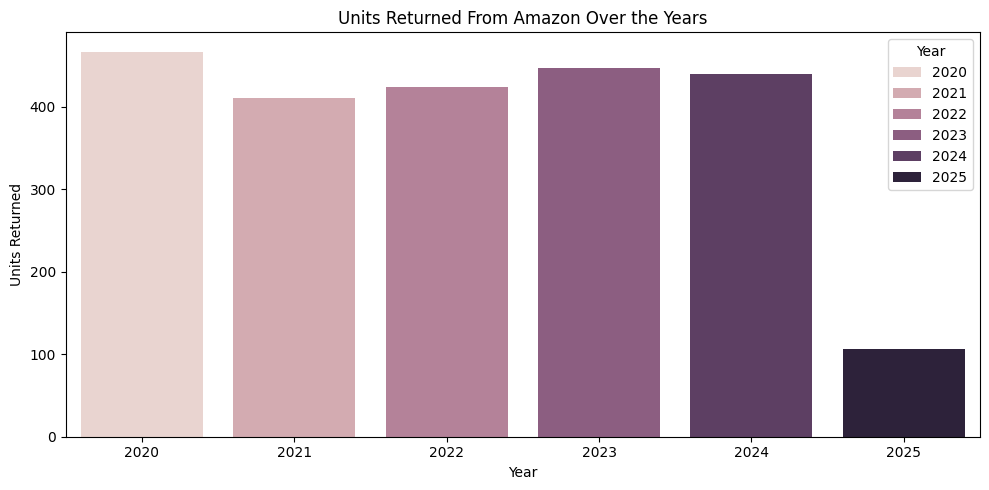

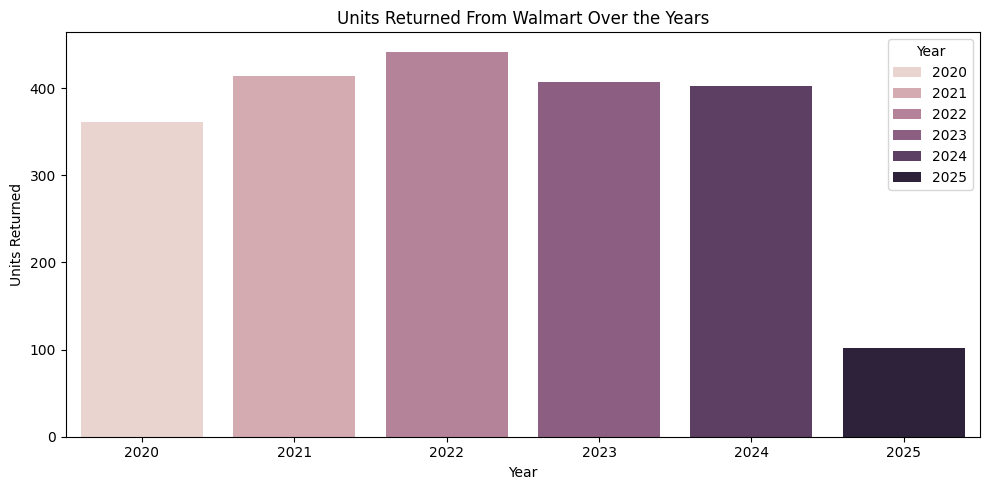

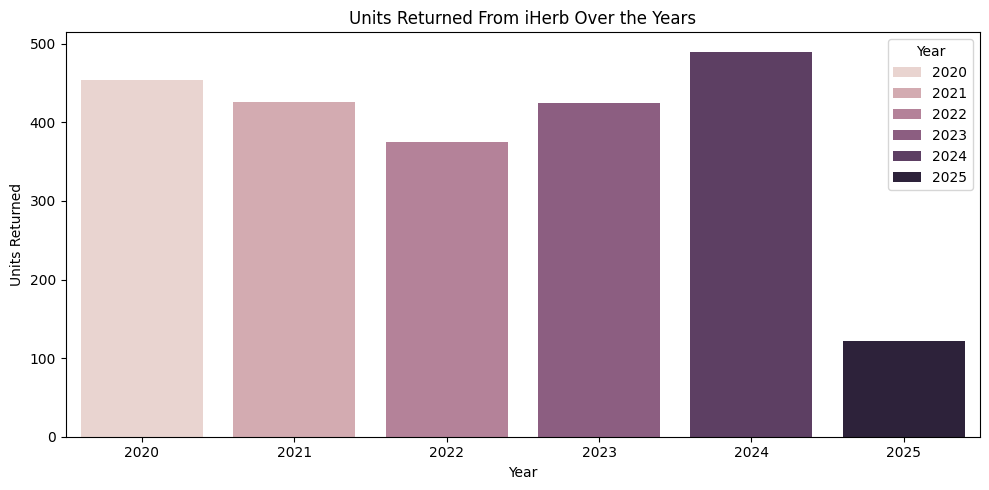

In [99]:
for platform in platoform_return_year_unstack.index:
  fig, ax = plt.subplots(figsize=(10,5))
  sns.barplot(x=platoform_return_year_unstack.loc[platform].index, y=platoform_return_year_unstack.loc[platform].values,
               ax=ax,hue=platoform_return_year_unstack.loc[platform].index)
  ax.set_title(f'Units Returned From {platform} Over the Years')
  ax.set_xlabel('Year')
  ax.set_ylabel('Units Returned')
  plt.tight_layout()
  plt.show()

## Location and Platform

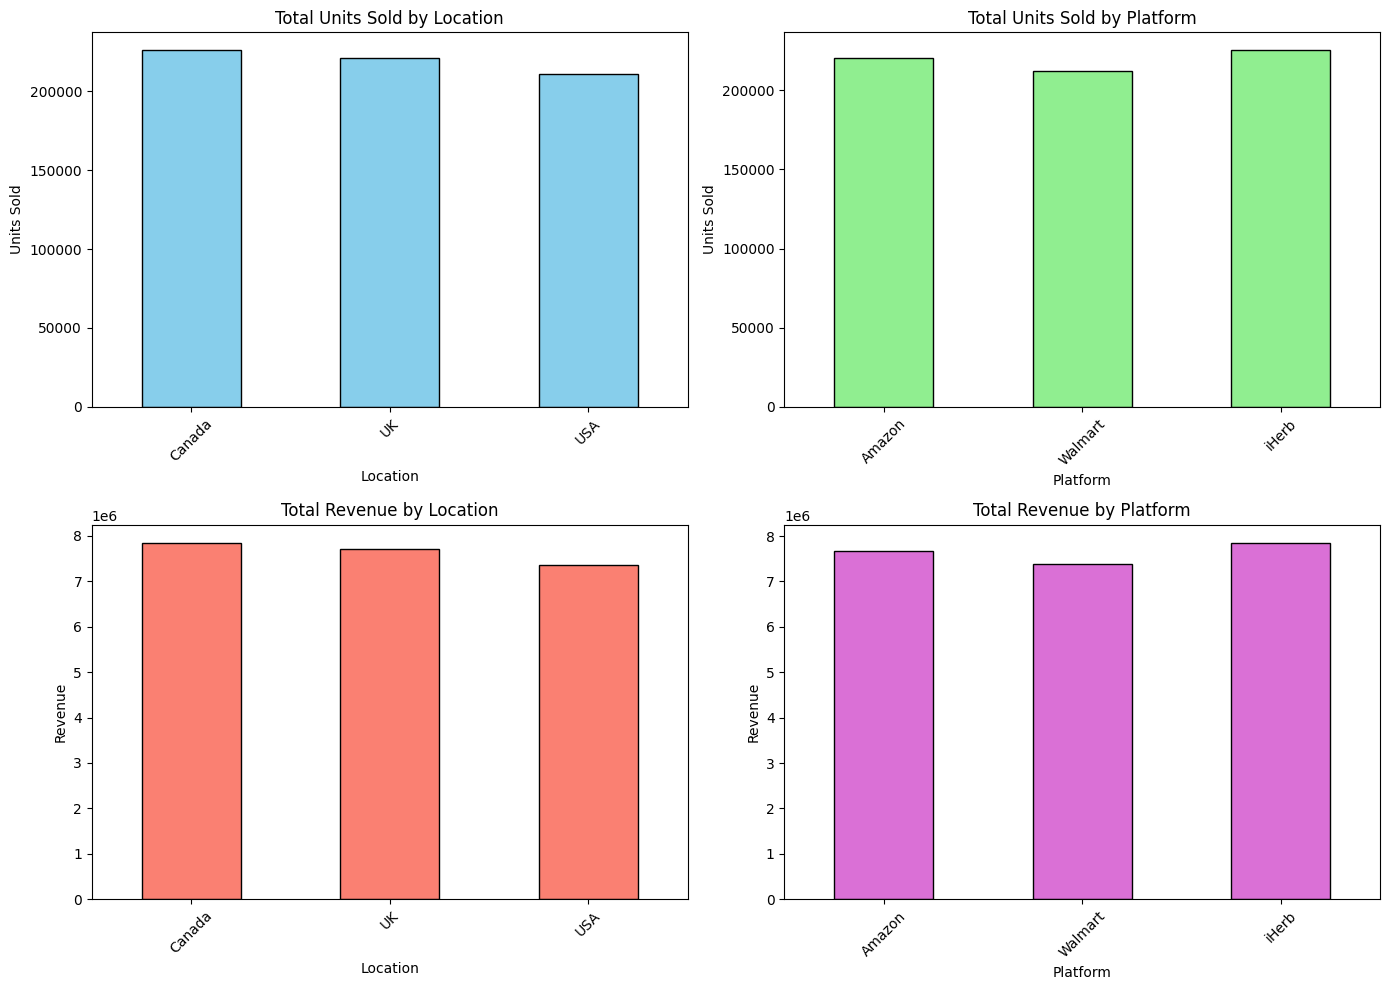

In [122]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Total units sold from each location
df.groupby('Location')['Units Sold'].sum().plot(
    kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black'
)
axes[0, 0].set_title('Total Units Sold by Location')
axes[0, 0].set_xlabel('Location')
axes[0, 0].set_ylabel('Units Sold')
axes[0, 0].tick_params(axis='x', rotation=45)

# Units sold by platform
df.groupby('Platform')['Units Sold'].sum().plot(
    kind='bar', ax=axes[0, 1], color='lightgreen', edgecolor='black'
)
axes[0, 1].set_title('Total Units Sold by Platform')
axes[0, 1].set_xlabel('Platform')
axes[0, 1].set_ylabel('Units Sold')
axes[0, 1].tick_params(axis='x', rotation=45)

# Total revenue collected from each location
df.groupby('Location')['Revenue'].sum().plot(
    kind='bar', ax=axes[1, 0], color='salmon', edgecolor='black'
)
axes[1, 0].set_title('Total Revenue by Location')
axes[1, 0].set_xlabel('Location')
axes[1, 0].set_ylabel('Revenue')
axes[1, 0].tick_params(axis='x', rotation=45)

# Total revenue collected from store (by Platform)
df.groupby('Platform')['Revenue'].sum().plot(
    kind='bar', ax=axes[1, 1], color='orchid', edgecolor='black'
)
axes[1, 1].set_title('Total Revenue by Platform')
axes[1, 1].set_xlabel('Platform')
axes[1, 1].set_ylabel('Revenue')
axes[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


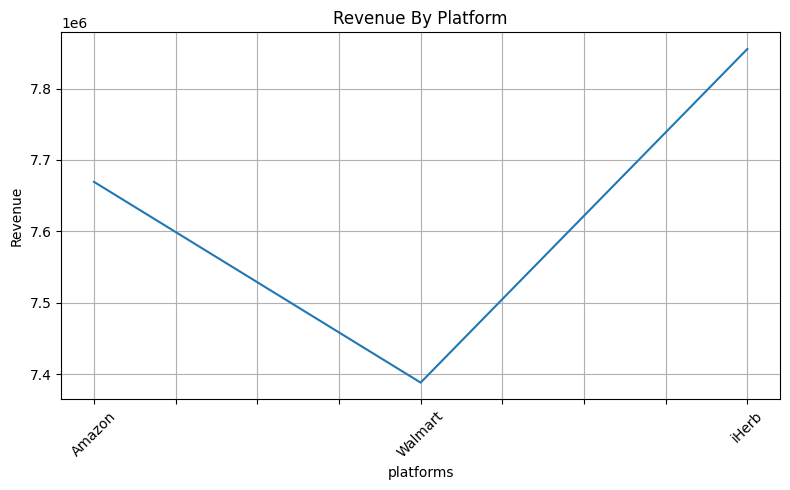

In [125]:
# total revenue by Platform
plt.figure(figsize=(8,5))
df.groupby("Platform")["Revenue"].sum().plot()
plt.title("Revenue By Platform")
plt.xlabel("platforms")
plt.ylabel("Revenue")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [123]:
# most growth yearly in terms of revenue from which Platform
platform_revenue_year = df.groupby(['Platform','Year'])['Revenue'].sum()
platform_revenue_year_unstack = platform_revenue_year.unstack()
platform_revenue_year_unstack

Year            2020        2021        2022        2023        2024  \
Platform                                                               
Amazon    1574643.60  1306556.53  1415203.28  1572885.49  1486213.90   
Walmart   1163234.18  1476022.33  1592276.26  1484853.82  1337583.37   
iHerb     1585515.44  1511669.31  1365329.01  1413131.44  1605570.08   

Year           2025  
Platform             
Amazon    313948.98  
Walmart   334597.66  
iHerb     374045.77

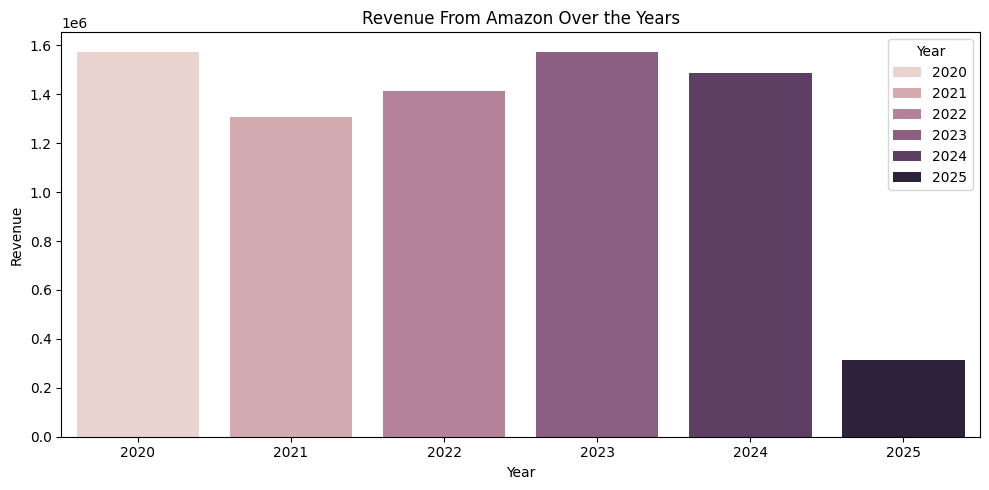

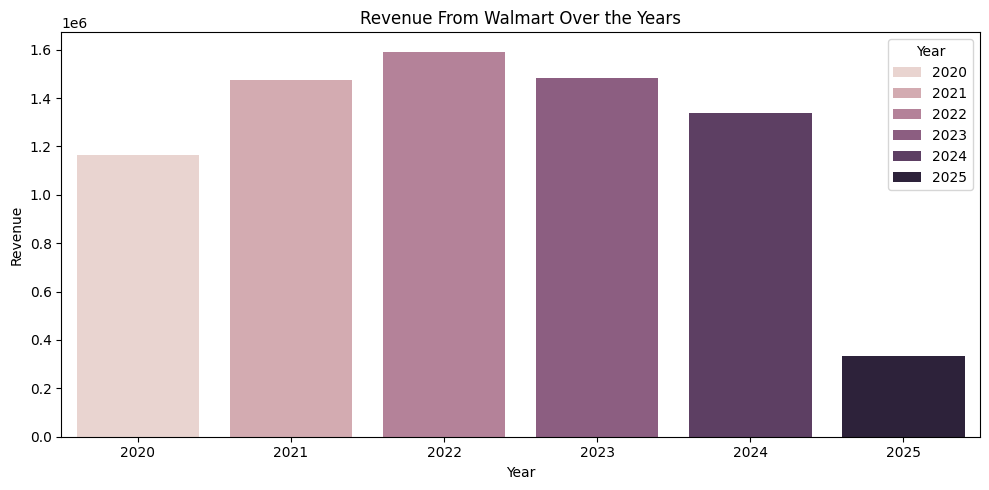

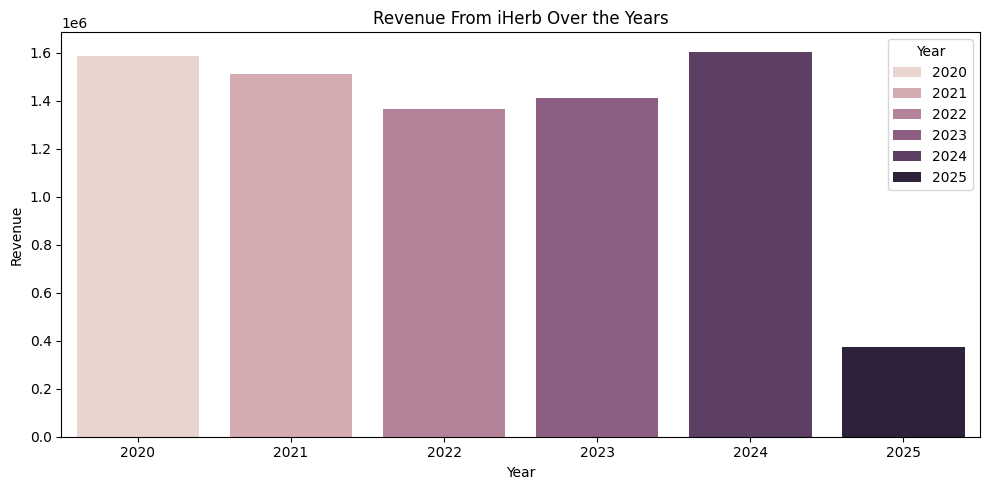

In [124]:
for platform in platform_revenue_year_unstack.index:
  fig, ax = plt.subplots(figsize=(10,5))
  sns.barplot(x=platform_revenue_year_unstack.loc[platform].index, y=platform_revenue_year_unstack.loc[platform].values,
               ax=ax,hue=platform_revenue_year_unstack.loc[platform].index)
  ax.set_title(f'Revenue From {platform} Over the Years')
  ax.set_xlabel('Year')
  ax.set_ylabel('Revenue')
  plt.tight_layout()
  plt.show()

## Featuring Net Revenue After Return

In [126]:
# Create net revenue after returns
returned_value = df['Units Returned'] * df['Price']
df['Net Revenue'] = df['Revenue'] - returned_value

In [131]:
df["Return Rate(%)"]=(df["Units Returned"]/df["Units Sold"])*100
df["Return Rate(%)"].replace([np.inf,-np.inf],np.nan,inplace=True)
df.dropna(subset=["Return Rate(%)"],inplace=True)

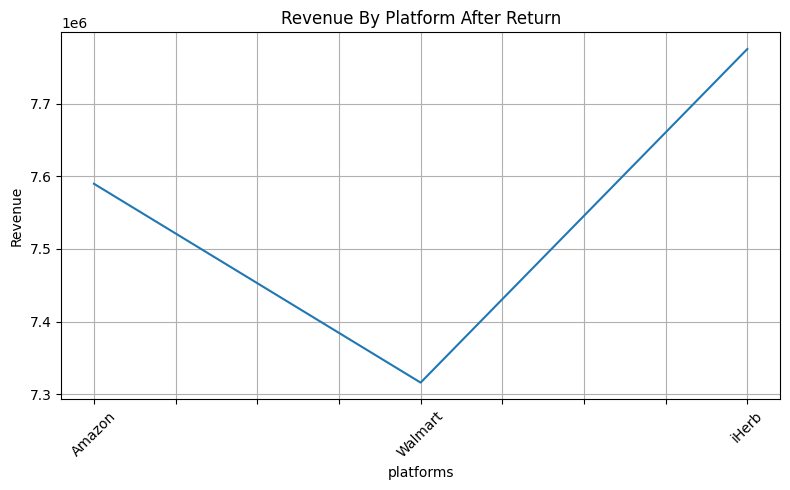

In [129]:
plt.figure(figsize=(8,5))
df.groupby("Platform")["Net Revenue"].sum().plot()
plt.title("Revenue By Platform After Return")
plt.xlabel("platforms")
plt.ylabel("Revenue")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

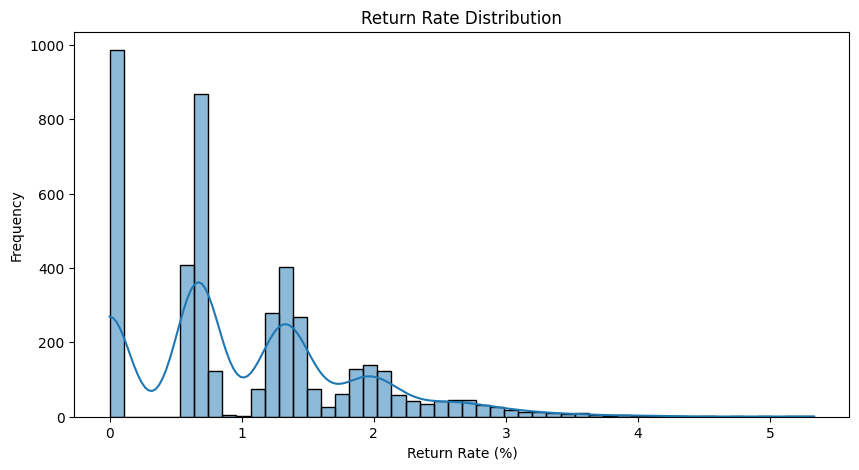

In [133]:
plt.figure(figsize=(10,5))
sns.histplot(df["Return Rate(%)"],bins=50,kde=True)
plt.title("Return Rate Distribution")
plt.xlabel("Return Rate (%)")
plt.ylabel("Frequency")
plt.show()

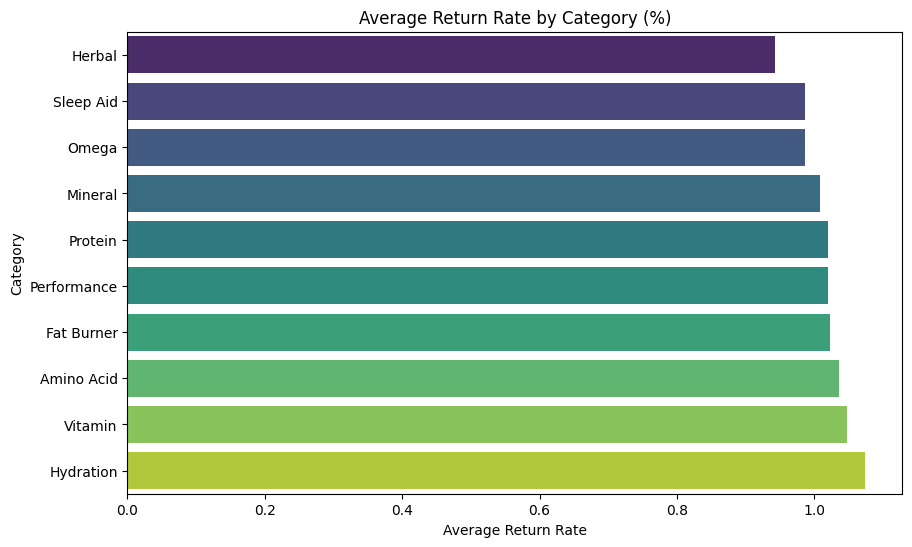

In [134]:
category_returns=df.groupby("Category")["Return Rate(%)"].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=category_returns.values,y=category_returns.index,palette="viridis")
plt.title("Average Return Rate by Category (%)")
plt.xlabel("Average Return Rate")
plt.ylabel("Category")
plt.show()

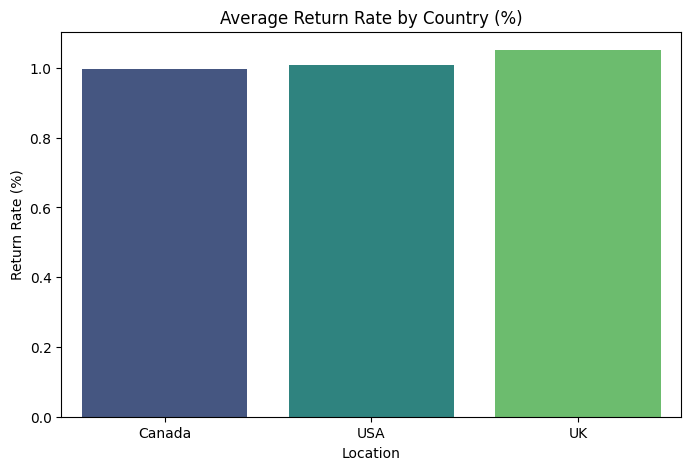

In [137]:
location_returns=df.groupby("Location")["Return Rate(%)"].mean().sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=location_returns.index, y=location_returns.values,palette='viridis')
plt.title("Average Return Rate by Country (%)")
plt.ylabel("Return Rate (%)")
plt.show()

## Correlation

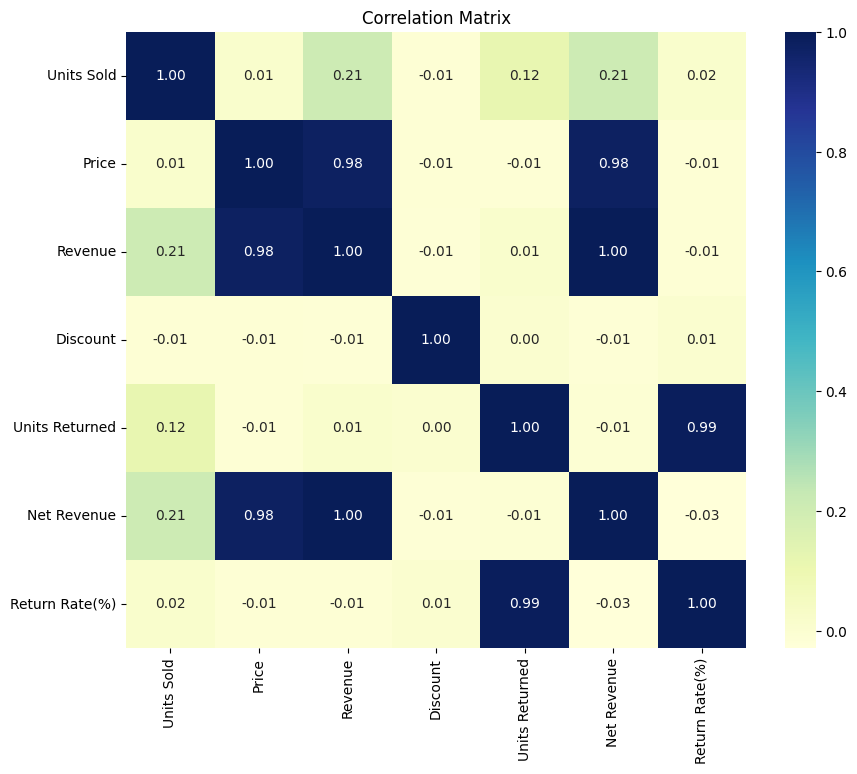

In [139]:
numeric_data=df.select_dtypes(include=["float64","int64"])
correlation_matrix=numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap="YlGnBu",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Model

In [140]:
pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [157]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Select only numeric columns for scaling and modeling
X = X.select_dtypes(include=['number'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE on scaled data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [158]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(max_depth=7,random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


 Logistic Regression accuracy: 18.13% 

Classification report for Logistic Regression:
              precision    recall  f1-score   support

  Amino Acid       0.00      0.00      0.00        60
  Fat Burner       0.00      0.00      0.00        55
      Herbal       0.00      0.00      0.00        63
   Hydration       0.00      0.00      0.00        52
     Mineral       0.21      0.30      0.25       171
       Omega       0.00      0.00      0.00        59
 Performance       0.00      0.00      0.00       116
     Protein       0.00      0.00      0.00        96
   Sleep Aid       0.00      0.00      0.00        51
     Vitamin       0.17      0.70      0.27       154

    accuracy                           0.18       877
   macro avg       0.04      0.10      0.05       877
weighted avg       0.07      0.18      0.10       877

Confusion matrix for Logistic Regression:
[[  0   0   0   0  12   0   0   0   0  48]
 [  0   0   0   0  14   0   0   0   0  41]
 [  0   0   0   0  17   0

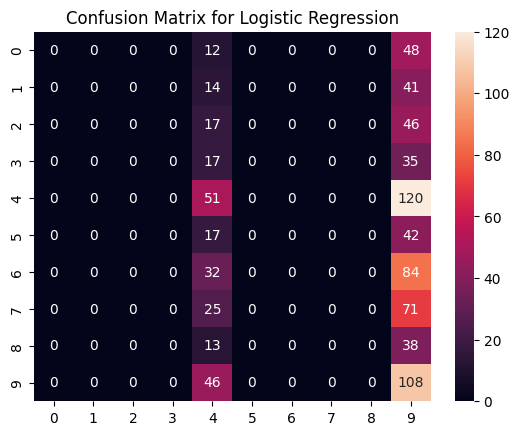


 Random Forest accuracy: 15.51% 

Classification report for Random Forest:
              precision    recall  f1-score   support

  Amino Acid       0.06      0.02      0.03        60
  Fat Burner       0.13      0.07      0.09        55
      Herbal       0.00      0.00      0.00        63
   Hydration       0.04      0.02      0.03        52
     Mineral       0.18      0.30      0.23       171
       Omega       0.00      0.00      0.00        59
 Performance       0.10      0.09      0.09       116
     Protein       0.14      0.16      0.15        96
   Sleep Aid       0.05      0.02      0.03        51
     Vitamin       0.19      0.34      0.25       154

    accuracy                           0.16       877
   macro avg       0.09      0.10      0.09       877
weighted avg       0.12      0.16      0.13       877

Confusion matrix for Random Forest:
[[ 1  0  3  1 18  0  8  8  2 19]
 [ 2  4  1  1  9  0  7  5  3 23]
 [ 3  4  0  2 24  0  4 10  0 16]
 [ 2  0  2  1 23  1  3  5  1 1

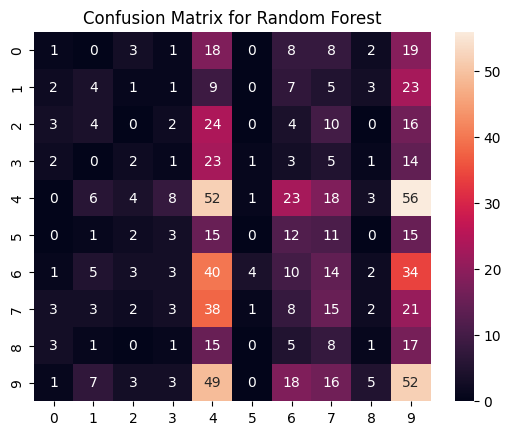


 Support Vector Machine accuracy: 17.56% 

Classification report for Support Vector Machine:
              precision    recall  f1-score   support

  Amino Acid       0.00      0.00      0.00        60
  Fat Burner       0.00      0.00      0.00        55
      Herbal       0.00      0.00      0.00        63
   Hydration       0.00      0.00      0.00        52
     Mineral       0.00      0.00      0.00       171
       Omega       0.00      0.00      0.00        59
 Performance       0.00      0.00      0.00       116
     Protein       0.00      0.00      0.00        96
   Sleep Aid       0.00      0.00      0.00        51
     Vitamin       0.18      1.00      0.30       154

    accuracy                           0.18       877
   macro avg       0.02      0.10      0.03       877
weighted avg       0.03      0.18      0.05       877

Confusion matrix for Support Vector Machine:
[[  0   0   0   0   0   0   0   0   0  60]
 [  0   0   0   0   0   0   0   0   0  55]
 [  0   0   0   

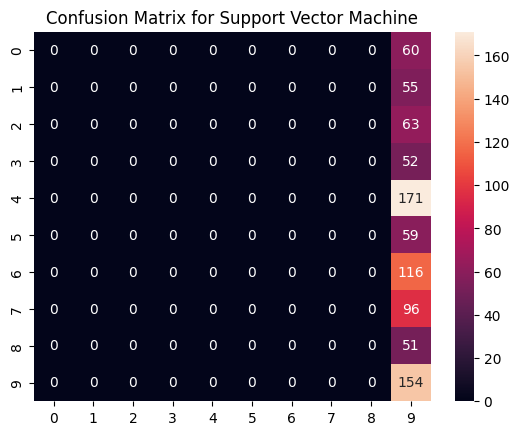


 Decision Tree accuracy: 16.99% 

Classification report for Decision Tree:
              precision    recall  f1-score   support

  Amino Acid       0.00      0.00      0.00        60
  Fat Burner       0.00      0.00      0.00        55
      Herbal       0.00      0.00      0.00        63
   Hydration       0.00      0.00      0.00        52
     Mineral       0.20      0.18      0.19       171
       Omega       0.00      0.00      0.00        59
 Performance       0.00      0.00      0.00       116
     Protein       0.14      0.01      0.02        96
   Sleep Aid       0.00      0.00      0.00        51
     Vitamin       0.17      0.77      0.28       154

    accuracy                           0.17       877
   macro avg       0.05      0.10      0.05       877
weighted avg       0.08      0.17      0.09       877

Confusion matrix for Decision Tree:
[[  0   0   0   0   8   1   0   2   0  49]
 [  1   0   0   0   8   1   1   0   0  44]
 [  0   0   0   0   9   1   0   1   0  52]


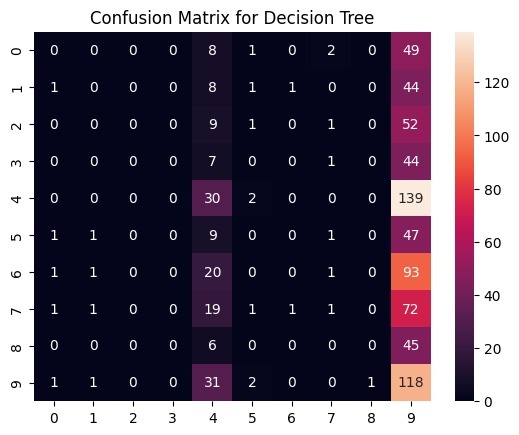


 K-Nearest Neighbors accuracy: 10.26% 

Classification report for K-Nearest Neighbors:
              precision    recall  f1-score   support

  Amino Acid       0.06      0.12      0.08        60
  Fat Burner       0.04      0.05      0.04        55
      Herbal       0.02      0.02      0.02        63
   Hydration       0.11      0.13      0.12        52
     Mineral       0.17      0.20      0.18       171
       Omega       0.10      0.03      0.05        59
 Performance       0.13      0.09      0.11       116
     Protein       0.07      0.06      0.06        96
   Sleep Aid       0.03      0.02      0.02        51
     Vitamin       0.13      0.12      0.12       154

    accuracy                           0.10       877
   macro avg       0.09      0.08      0.08       877
weighted avg       0.10      0.10      0.10       877

Confusion matrix for K-Nearest Neighbors:
[[ 7  6  4  7 15  0  5  8  2  6]
 [ 4  3  4  2 12  4  4 10  4  8]
 [10  4  1  1 19  1  7  9  1 10]
 [ 4  6  3  

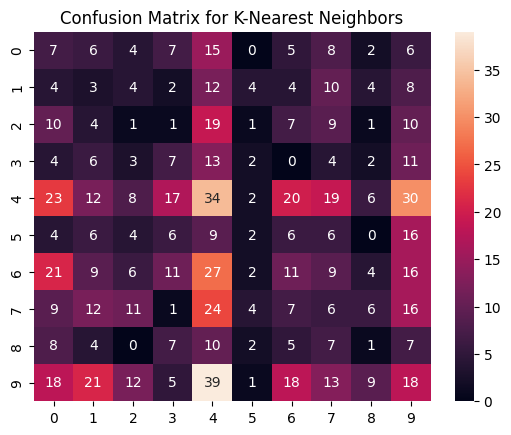

In [159]:
for name, clf in classifiers.items():
    model = clf
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n {name} accuracy: {accuracy*100:.2f}% \n')
    report = classification_report(y_test, y_pred)
    print(f'Classification report for {name}:\n{report}')

    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion matrix for {name}:\n{cm}')
    feature_names = X.columns.tolist()
    if name == 'Decision Tree':
        plt.figure(figsize=(150, 100))
        plot_tree(clf, feature_names=feature_names, class_names=[str(i) for i in clf.classes_],
                  filled=True, rounded=True, fontsize=10)
        plt.title('Árbol de Decisión')
        plt.show()
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
